<a href="https://www.kaggle.com/code/dharunn/project-stock?scriptVersionId=115046849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

STOCK PREDICTION : 

TEAM:

    DEEPAK SANJAY SJ    CB.EN.U4CSE20018
    
    DHARUN N            CB.EN.U4CSE20017
    
    GOWRISHANKAR S      CB.EN.U4CSE20022
    
    KISORE PIRAJIN TS   CB.EN.U4CSE20033
    
    PRADISHWARAN D      CB.EN.U4CSE20049

In [116]:
!pip install vaderSentiment
!pip install textblob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user
/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv
/kaggle/input/stocknews/RedditNews.csv


In [117]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from matplotlib import pyplot as plt

In [118]:
data = pd.read_csv("../input/stocknews/Combined_News_DJIA.csv")
data.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   
3                      b'Elephants extinct by 2020?'   
4  b'Bank analyst forecast Georgian crisis 2 days...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufac

In [119]:
data2=pd.read_csv("../input/stocknews/upload_DJIA_table.csv")
data2.head()

Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234

In [120]:
data.shape,data2.shape

((1989, 27), (1989, 7))

In [121]:
merge=data.merge(data2,how="inner",on="Date")
merge.head(3)

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   
2  b'All signs point to the US encouraging Georgi...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   

           High           Low         Close     Volume     Adj Close  
0  11759.959961  11388.040039  11734.320312  212830000  11734.320312  
1  11867.110352  11675.530273  11782.349609  183190000  11782.349609  
2  11782.349609  11601.519531  11642.469727  173590000  11642.469727  

[3 rows x 33 columns]

# **Feature Extraction**

In [122]:
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:27]))

In [123]:
headline[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [124]:
clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i]))
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i])
    clean_headline[i]=re.sub("\'",'',clean_headline[i]) 

In [125]:
clean_headline[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [126]:
merge['Combined_News'] = clean_headline

In [127]:
merge.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   
3  b' Quarter of Russians blame U.S. for conflict...   
4  b'Russia: World  "can forget about" Georgia\'s...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   
3  b'Georgian president  says US military will ta...   
4  b'Darfur rebels accuse Sudan of mounting major...   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   
3  b'2006: Nobel laureate Aleksander Solzhenitsyn...  11632.809570   
4  b'Philippines : Peace Advocate say Muslims nee...  11532.070312   

           High           Low         Close     Volume     Adj Close  \
0 

In [128]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [129]:
merge['Subjectivity'] = merge['Combined_News'].apply(get_subjectivity)

In [130]:
merge['Polarity'] = merge['Combined_News'].apply(get_polarity)

In [131]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [132]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Combined_News'])):
    SIA= getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [133]:
merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu

In [134]:
merge.head(3)

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   

                                                Top8  ...         Close  \
0  b"The 'enemy combatent' trials are nothing but...  ...  11734.320312   
1  b'An American citizen living in S.Ossetia blam...  ...  11782.349609   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...  11642.469727   

      Volume     Adj Close                                      Combined_News  \
0  212830000  11734.320312  Georgia downs two Russian warplanes as countri...   
1  183190000  11782.349609  Why wont America and Nato help us? If they won...   
2  173590000  11642.469727  Remember that adorable 9-year-old who sang at ...   

  Subjectivity  Polarity compound    neg    pos    neu  
0     0.267549 -0.048568  -0.9982  0.235  0.041  0.724  
1     0.374806  0.121956  -0.9858  0.191  0.089  0.721  
2     0.536234 -0.044302  -0.9715  0.128  0.056  0.816  

[3 rows x 40 columns]

In [135]:
df= merge[['Date','Label','Open','Close','Adj Close', 'High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
df

Date  Label          Open         Close     Adj Close  \
0     2008-08-08      0  11432.089844  11734.320312  11734.320312   
1     2008-08-11      1  11729.669922  11782.349609  11782.349609   
2     2008-08-12      0  11781.700195  11642.469727  11642.469727   
3     2008-08-13      0  11632.809570  11532.959961  11532.959961   
4     2008-08-14      1  11532.070312  11615.929688  11615.929688   
...          ...    ...           ...           ...           ...   
1984  2016-06-27      0  17355.210938  17140.240234  17140.240234   
1985  2016-06-28      1  17190.509766  17409.720703  17409.720703   
1986  2016-06-29      1  17456.019531  17694.679688  17694.679688   
1987  2016-06-30      1  17712.759766  17929.990234  17929.990234   
1988  2016-07-01      1  17924.240234  17949.369141  17949.369141   

              High           Low     Volume  Subjectivity  Polarity  compound  \
0     11759.959961  11388.040039  212830000      0.267549 -0.048568   -0.9982   
1     11867.110352  11675.530273  183190000      0.374806  0.121956   -0.9858   
2     11782.349609  11601.519531  173590000      0.536234 -0.044302   -0.9715   
3     11633.780273  11453.339844  182550000      0.364021  0.011398   -0.9809   
4     11718.280273  11450.889648  159790000      0.375099  0.040677   -0.9882   
...            ...           ...        ...           ...       ...       ...   
1984  17355.210938  17063.080078  138740000      0.352311 -0.014015   -0.9644   
1985  17409.720703  17190.509766  112190000      0.352649  0.046560   -0.9571   
1986  17704.509766  17456.019531  106380000      0.389617  0.052622   -0.9975   
1987  17930.609375  17711.800781  133030000      0.382566  0.011243   -0.9977   
1988  18002.380859  17916.910156   82160000      0.320261 -0.035458   -0.9983   

        neg    pos    neu  
0     0.235  0.041  0.724  
1     0.191  0.089  0.721  
2     0.128  0.056  0.816  
3     0.146  0.066  0.788  
4     0.189  0.094  0.717  
...     ...    ...    ...  
1984  0.148  0.094  0.758  
1985  0.132  0.102  0.767  
1986  0.225  0.091  0.684  
1987  0.202  0.061  0.738  
1988  0.212  0.059  0.729  

[1989 rows x 14 columns]

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1989 non-null   object 
 1   Label         1989 non-null   int64  
 2   Open          1989 non-null   float64
 3   Close         1989 non-null   float64
 4   Adj Close     1989 non-null   float64
 5   High          1989 non-null   float64
 6   Low           1989 non-null   float64
 7   Volume        1989 non-null   int64  
 8   Subjectivity  1989 non-null   float64
 9   Polarity      1989 non-null   float64
 10  compound      1989 non-null   float64
 11  neg           1989 non-null   float64
 12  pos           1989 non-null   float64
 13  neu           1989 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 297.6+ KB


In [137]:
df.isnull().sum()

Date            0
Label           0
Open            0
Close           0
Adj Close       0
High            0
Low             0
Volume          0
Subjectivity    0
Polarity        0
compound        0
neg             0
pos             0
neu             0
dtype: int64

In [138]:
df.duplicated().sum()

0

In [139]:
df["OC Increase"]=((df["Close"]-df["Open"])/df["Open"])*100
df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Label          Open         Close     Adj Close          High  \
0  2008-08-08      0  11432.089844  11734.320312  11734.320312  11759.959961   
1  2008-08-11      1  11729.669922  11782.349609  11782.349609  11867.110352   
2  2008-08-12      0  11781.700195  11642.469727  11642.469727  11782.349609   
3  2008-08-13      0  11632.809570  11532.959961  11532.959961  11633.780273   
4  2008-08-14      1  11532.070312  11615.929688  11615.929688  11718.280273   

            Low     Volume  Subjectivity  Polarity  compound    neg    pos  \
0  11388.040039  212830000      0.267549 -0.048568   -0.9982  0.235  0.041   
1  11675.530273  183190000      0.374806  0.121956   -0.9858  0.191  0.089   
2  11601.519531  173590000      0.536234 -0.044302   -0.9715  0.128  0.056   
3  11453.339844  182550000      0.364021  0.011398   -0.9809  0.146  0.066   
4  11450.889648  159790000      0.375099  0.040677   -0.9882  0.189  0.094   

     neu  OC Increase  
0  0.724     2.643703  
1  0.721     0.449115  
2  0.816    -1.181752  
3  0.788    -0.858345  
4  0.717     0.727184

In [140]:
df["HL Average"]=((df["High"]+df["Low"])/2)
df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Label          Open         Close     Adj Close          High  \
0  2008-08-08      0  11432.089844  11734.320312  11734.320312  11759.959961   
1  2008-08-11      1  11729.669922  11782.349609  11782.349609  11867.110352   
2  2008-08-12      0  11781.700195  11642.469727  11642.469727  11782.349609   
3  2008-08-13      0  11632.809570  11532.959961  11532.959961  11633.780273   
4  2008-08-14      1  11532.070312  11615.929688  11615.929688  11718.280273   

            Low     Volume  Subjectivity  Polarity  compound    neg    pos  \
0  11388.040039  212830000      0.267549 -0.048568   -0.9982  0.235  0.041   
1  11675.530273  183190000      0.374806  0.121956   -0.9858  0.191  0.089   
2  11601.519531  173590000      0.536234 -0.044302   -0.9715  0.128  0.056   
3  11453.339844  182550000      0.364021  0.011398   -0.9809  0.146  0.066   
4  11450.889648  159790000      0.375099  0.040677   -0.9882  0.189  0.094   

     neu  OC Increase    HL Average  
0  0.724     2.643703  11574.000000  
1  0.721     0.449115  11771.320312  
2  0.816    -1.181752  11691.934570  
3  0.788    -0.858345  11543.560058  
4  0.717     0.727184  11584.584961

In [141]:
if(df['Adj Close'].equals(df['Close'])):
    df.drop(['Adj Close'], axis=1, inplace=True)
df

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Label          Open         Close          High  \
0     2008-08-08      0  11432.089844  11734.320312  11759.959961   
1     2008-08-11      1  11729.669922  11782.349609  11867.110352   
2     2008-08-12      0  11781.700195  11642.469727  11782.349609   
3     2008-08-13      0  11632.809570  11532.959961  11633.780273   
4     2008-08-14      1  11532.070312  11615.929688  11718.280273   
...          ...    ...           ...           ...           ...   
1984  2016-06-27      0  17355.210938  17140.240234  17355.210938   
1985  2016-06-28      1  17190.509766  17409.720703  17409.720703   
1986  2016-06-29      1  17456.019531  17694.679688  17704.509766   
1987  2016-06-30      1  17712.759766  17929.990234  17930.609375   
1988  2016-07-01      1  17924.240234  17949.369141  18002.380859   

               Low     Volume  Subjectivity  Polarity  compound    neg    pos  \
0     11388.040039  212830000      0.267549 -0.048568   -0.9982  0.235  0.041   
1     11675.530273  183190000      0.374806  0.121956   -0.9858  0.191  0.089   
2     11601.519531  173590000      0.536234 -0.044302   -0.9715  0.128  0.056   
3     11453.339844  182550000      0.364021  0.011398   -0.9809  0.146  0.066   
4     11450.889648  159790000      0.375099  0.040677   -0.9882  0.189  0.094   
...            ...        ...           ...       ...       ...    ...    ...   
1984  17063.080078  138740000      0.352311 -0.014015   -0.9644  0.148  0.094   
1985  17190.509766  112190000      0.352649  0.046560   -0.9571  0.132  0.102   
1986  17456.019531  106380000      0.389617  0.052622   -0.9975  0.225  0.091   
1987  17711.800781  133030000      0.382566  0.011243   -0.9977  0.202  0.061   
1988  17916.910156   82160000      0.320261 -0.035458   -0.9983  0.212  0.059   

        neu  OC Increase    HL Average  
0     0.724     2.643703  11574.000000  
1     0.721     0.449115  11771.320312  
2     0.816    -1.181752  11691.934570  
3     0.788    -0.858345  11543.560058  
4     0.717     0.727184  11584.584961  
...     ...          ...           ...  
1984  0.758    -1.238652  17209.145508  
1985  0.767     1.275186  17300.115235  
1986  0.684     1.367208  17580.264649  
1987  0.738     1.226407  17821.205078  
1988  0.729     0.140195  17959.645508  

[1989 rows x 15 columns]

In [142]:
df["Total"]=((df["HL Average"]*df["Volume"]))
df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Label          Open         Close          High           Low  \
0  2008-08-08      0  11432.089844  11734.320312  11759.959961  11388.040039   
1  2008-08-11      1  11729.669922  11782.349609  11867.110352  11675.530273   
2  2008-08-12      0  11781.700195  11642.469727  11782.349609  11601.519531   
3  2008-08-13      0  11632.809570  11532.959961  11633.780273  11453.339844   
4  2008-08-14      1  11532.070312  11615.929688  11718.280273  11450.889648   

      Volume  Subjectivity  Polarity  compound    neg    pos    neu  \
0  212830000      0.267549 -0.048568   -0.9982  0.235  0.041  0.724   
1  183190000      0.374806  0.121956   -0.9858  0.191  0.089  0.721   
2  173590000      0.536234 -0.044302   -0.9715  0.128  0.056  0.816   
3  182550000      0.364021  0.011398   -0.9809  0.146  0.066  0.788   
4  159790000      0.375099  0.040677   -0.9882  0.189  0.094  0.717   

   OC Increase    HL Average         Total  
0     2.643703  11574.000000  2.463294e+12  
1     0.449115  11771.320312  2.156388e+12  
2    -1.181752  11691.934570  2.029603e+12  
3    -0.858345  11543.560058  2.107277e+12  
4     0.727184  11584.584961  1.851101e+12

In [143]:
df.to_csv('out.csv', index=False)  

# **DATA EXPLORATION**

In [144]:
df.describe()

Label          Open         Close          High           Low  \
count  1989.000000   1989.000000   1989.000000   1989.000000   1989.000000   
mean      0.535445  13459.116048  13463.032255  13541.303173  13372.931728   
std       0.498867   3143.281634   3144.006996   3136.271725   3150.420934   
min       0.000000   6547.009766   6547.049805   6709.609863   6469.950195   
25%       0.000000  10907.339844  10913.379883  11000.980469  10824.759766   
50%       1.000000  13022.049805  13025.580078  13088.110352  12953.129883   
75%       1.000000  16477.699219  16478.410156  16550.070312  16392.769531   
max       1.000000  18315.060547  18312.390625  18351.359375  18272.560547   

             Volume  Subjectivity     Polarity     compound          neg  \
count  1.989000e+03   1989.000000  1989.000000  1989.000000  1989.000000   
mean   1.628110e+08      0.361426     0.022722    -0.957369     0.162315   
std    9.392343e+07      0.060884     0.053687     0.199673     0.038575   
min    8.410000e+06      0.161332    -0.225978    -0.999500     0.059000   
25%    1.000000e+08      0.321410    -0.011461    -0.996400     0.135000   
50%    1.351700e+08      0.361652     0.024870    -0.993200     0.159000   
75%    1.926000e+08      0.400533     0.057980    -0.985500     0.188000   
max    6.749200e+08      0.615242     0.195774     0.991700     0.316000   

               pos          neu  OC Increase    HL Average         Total  
count  1989.000000  1989.000000  1989.000000   1989.000000  1.989000e+03  
mean      0.065675     0.772018     0.036604  13457.117450  1.986384e+12  
std       0.020968     0.041819     1.252473   3142.853401  7.898564e+11  
min       0.007000     0.588000    -7.783348   6612.560059  1.027956e+11  
25%       0.051000     0.746000    -0.439600  10914.635254  1.529435e+12  
50%       0.064000     0.773000     0.064172  13021.209961  1.813743e+12  
75%       0.079000     0.802000     0.569491  16472.785156  2.192193e+12  
max       0.153000     0.894000    10.932930  18311.345703  1.115241e+13

In [145]:
df.median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Label           1.000000e+00
Open            1.302205e+04
Close           1.302558e+04
High            1.308811e+04
Low             1.295313e+04
Volume          1.351700e+08
Subjectivity    3.616522e-01
Polarity        2.486969e-02
compound       -9.932000e-01
neg             1.590000e-01
pos             6.400000e-02
neu             7.730000e-01
OC Increase     6.417188e-02
HL Average      1.302121e+04
Total           1.813743e+12
dtype: float64

In [146]:
df.shape

(1989, 16)

In [147]:
df.dtypes

Date             object
Label             int64
Open            float64
Close           float64
High            float64
Low             float64
Volume            int64
Subjectivity    float64
Polarity        float64
compound        float64
neg             float64
pos             float64
neu             float64
OC Increase     float64
HL Average      float64
Total           float64
dtype: object

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1989 non-null   object 
 1   Label         1989 non-null   int64  
 2   Open          1989 non-null   float64
 3   Close         1989 non-null   float64
 4   High          1989 non-null   float64
 5   Low           1989 non-null   float64
 6   Volume        1989 non-null   int64  
 7   Subjectivity  1989 non-null   float64
 8   Polarity      1989 non-null   float64
 9   compound      1989 non-null   float64
 10  neg           1989 non-null   float64
 11  pos           1989 non-null   float64
 12  neu           1989 non-null   float64
 13  OC Increase   1989 non-null   float64
 14  HL Average    1989 non-null   float64
 15  Total         1989 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 328.7+ KB


In [149]:
df.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Label           2.488688e-01
Open            9.880219e+06
Close           9.884780e+06
High            9.836200e+06
Low             9.925152e+06
Volume          8.821610e+15
Subjectivity    3.706896e-03
Polarity        2.882268e-03
compound        3.986933e-02
neg             1.488007e-03
pos             4.396681e-04
neu             1.748834e-03
OC Increase     1.568690e+00
HL Average      9.877527e+06
Total           6.238731e+23
dtype: float64

In [150]:
df.cov()

Label          Open         Close          High  \
Label         2.488688e-01 -2.272122e+01  2.636716e+01  1.071666e+00   
Open         -2.272122e+01  9.880219e+06  9.872527e+06  9.854163e+06   
Close         2.636716e+01  9.872527e+06  9.884780e+06  9.855979e+06   
High          1.071666e+00  9.854163e+06  9.855979e+06  9.836200e+06   
Low           7.229442e+00  9.897074e+06  9.900935e+06  9.874379e+06   
Volume       -2.421139e+06 -2.041858e+11 -2.050184e+11 -2.023682e+11   
Subjectivity -4.687343e-04 -1.840444e+01 -1.866587e+01 -1.846513e+01   
Polarity      2.258530e-04  1.567779e+01  1.584298e+01  1.583395e+01   
compound      4.505526e-04  1.297458e+01  1.238084e+01  1.266694e+01   
neg          -4.075395e-04 -2.874546e+01 -2.859022e+01 -2.853356e+01   
pos           1.121214e-04 -4.482104e+00 -4.519926e+00 -4.456323e+00   
neu           2.931207e-04  3.324923e+01  3.313134e+01  3.301260e+01   
OC Increase   3.987217e-01 -1.010820e+02  6.912336e+01 -1.883464e+01   
HL Average    4.150554e+00  9.875618e+06  9.878457e+06  9.855290e+06   
Total        -2.606604e+10 -8.363693e+14 -8.469030e+14 -8.214974e+14   

                       Low        Volume  Subjectivity      Polarity  \
Label         7.229442e+00 -2.421139e+06 -4.687343e-04  2.258530e-04   
Open          9.897074e+06 -2.041858e+11 -1.840444e+01  1.567779e+01   
Close         9.900935e+06 -2.050184e+11 -1.866587e+01  1.584298e+01   
High          9.874379e+06 -2.023682e+11 -1.846513e+01  1.583395e+01   
Low           9.925152e+06 -2.070022e+11 -1.859535e+01  1.577149e+01   
Volume       -2.070022e+11  8.821610e+15  3.037028e+05 -3.616003e+05   
Subjectivity -1.859535e+01  3.037028e+05  3.706896e-03  1.412020e-04   
Polarity      1.577149e+01 -3.616003e+05  1.412020e-04  2.882268e-03   
compound      1.263139e+01 -7.175467e+05  1.923189e-04  1.523637e-03   
neg          -2.882466e+01  7.271634e+05  9.030755e-05 -5.489527e-04   
pos          -4.541640e+00  5.738806e+04  1.886596e-04  3.168680e-04   
neu           3.338557e+01 -7.843633e+05 -2.792398e-04  2.329391e-04   
OC Increase  -5.409235e+00 -4.889512e+06 -2.261736e-03  1.836236e-03   
HL Average    9.899765e+06 -2.046852e+11 -1.853024e+01  1.580272e+01   
Total        -8.633079e+14  6.424866e+19  1.427733e+09 -1.400930e+09   

                  compound           neg           pos           neu  \
Label         4.505526e-04 -4.075395e-04  1.121214e-04  2.931207e-04   
Open          1.297458e+01 -2.874546e+01 -4.482104e+00  3.324923e+01   
Close         1.238084e+01 -2.859022e+01 -4.519926e+00  3.313134e+01   
High          1.266694e+01 -2.853356e+01 -4.456323e+00  3.301260e+01   
Low           1.263139e+01 -2.882466e+01 -4.541640e+00  3.338557e+01   
Volume       -7.175467e+05  7.271634e+05  5.738806e+04 -7.843633e+05   
Subjectivity  1.923189e-04  9.030755e-05  1.886596e-04 -2.792398e-04   
Polarity      1.523637e-03 -5.489527e-04  3.168680e-04  2.329391e-04   
compound      3.986933e-02 -2.345458e-03  1.274595e-03  1.072698e-03   
neg          -2.345458e-03  1.488007e-03 -8.958535e-05 -1.398772e-03   
pos           1.274595e-03 -8.958535e-05  4.396681e-04 -3.497748e-04   
neu           1.072698e-03 -1.398772e-03 -3.497748e-04  1.748834e-03   
OC Increase  -4.241838e-03  1.506948e-03 -1.410751e-05 -1.493561e-03   
HL Average    1.264916e+01 -2.867911e+01 -4.498982e+00  3.319909e+01   
Total        -5.951295e+09  3.453899e+09  1.647065e+08 -3.609900e+09   

               OC Increase    HL Average         Total  
Label         3.987217e-01  4.150554e+00 -2.606604e+10  
Open         -1.010820e+02  9.875618e+06 -8.363693e+14  
Close         6.912336e+01  9.878457e+06 -8.469030e+14  
High         -1.883464e+01  9.855290e+06 -8.214974e+14  
Low          -5.409235e+00  9.899765e+06 -8.633079e+14  
Volume       -4.889512e+06 -2.046852e+11  6.424866e+19  
Subjectivity -2.261736e-03 -1.853024e+01  1.427733e+09  
Polarity      1.836236e-03  1.580272e+01 -1.400930e+09  
compound     -4.241838e-03  1.264916e+01 -5.95129

In [151]:
df.corr()

Label      Open     Close      High       Low    Volume  \
Label         1.000000 -0.014490  0.016811  0.000685  0.004600 -0.051673   
Open         -0.014490  1.000000  0.998991  0.999592  0.999436 -0.691621   
Close         0.016811  0.998991  1.000000  0.999546  0.999595 -0.694281   
High          0.000685  0.999592  0.999546  1.000000  0.999373 -0.686997   
Low           0.004600  0.999436  0.999595  0.999373  1.000000 -0.699572   
Volume       -0.051673 -0.691621 -0.694281 -0.686997 -0.699572  1.000000   
Subjectivity -0.015433 -0.096169 -0.097512 -0.096702 -0.096946  0.053109   
Polarity      0.008433  0.092904  0.093861  0.094039  0.093247 -0.071711   
compound      0.004523  0.020672  0.019722  0.020227  0.020080 -0.038261   
neg          -0.021178 -0.237074 -0.235739 -0.235852 -0.237188  0.200704   
pos           0.010719 -0.068004 -0.068562 -0.067764 -0.068751  0.029140   
neu           0.014050  0.252944  0.251989  0.251705  0.253405 -0.199696   
OC Increase   0.638140 -0.025676  0.017554 -0.004795 -0.001371 -0.041565   
HL Average    0.002647  0.999671  0.999727  0.999842  0.999844 -0.693407   
Total        -0.066152 -0.336873 -0.341037 -0.331623 -0.346936  0.866048   

              Subjectivity  Polarity  compound       neg       pos       neu  \
Label            -0.015433  0.008433  0.004523 -0.021178  0.010719  0.014050   
Open             -0.096169  0.092904  0.020672 -0.237074 -0.068004  0.252944   
Close            -0.097512  0.093861  0.019722 -0.235739 -0.068562  0.251989   
High             -0.096702  0.094039  0.020227 -0.235852 -0.067764  0.251705   
Low              -0.096946  0.093247  0.020080 -0.237188 -0.068751  0.253405   
Volume            0.053109 -0.071711 -0.038261  0.200704  0.029140 -0.199696   
Subjectivity      1.000000  0.043198  0.015820  0.038452  0.147779 -0.109673   
Polarity          0.043198  1.000000  0.142133 -0.265073  0.281481  0.103753   
compound          0.015820  0.142133  1.000000 -0.304513  0.304432  0.128465   
neg               0.038452 -0.265073 -0.304513  1.000000 -0.110757 -0.867102   
pos               0.147779  0.281481  0.304432 -0.110757  1.000000 -0.398889   
neu              -0.109673  0.103753  0.128465 -0.867102 -0.398889  1.000000   
OC Increase      -0.029660  0.027308 -0.016962  0.031191 -0.000537 -0.028515   
HL Average       -0.096839  0.093657  0.020157 -0.236559 -0.068270  0.252597   
Total             0.029689 -0.033037 -0.037735  0.113360  0.009945 -0.109288   

              OC Increase  HL Average     Total  
Label            0.638140    0.002647 -0.066152  
Open            -0.025676    0.999671 -0.336873  
Close            0.017554    0.999727 -0.341037  
High            -0.004795    0.999842 -0.331623  
Low             -0.001371    0.999844 -0.346936  
Volume          -0.041565   -0.693407  0.866048  
Subjectivity    -0.029660   -0.096839  0.029689  
Polarity         0.027308    0.093657 -0.033037  
compound        -0.016962    0.020157 -0.037735  
neg              0.031191   -0.236559  0.113360  
pos             -0.000537   -0.068270  0.009945  
neu             -0.028515    0.252597 -0.109288  
OC Increase      1.000000   -0.003079 -0.069605  
HL Average      -0.003079    1.000000 -0.339350  
Total           -0.069605   -0.339350  1.000000

In [152]:
print(df.skew())
print(df.kurt())

Label          -0.142245
Open           -0.072689
Close          -0.074162
High           -0.063396
Low            -0.083832
Volume          1.957286
Subjectivity    0.154518
Polarity       -0.157040
compound        7.438315
neg             0.395979
pos             0.457811
neu            -0.288315
OC Increase     0.163279
HL Average     -0.073279
Total           2.746708
dtype: float64
Label           -1.981760
Open            -1.214983
Close           -1.215095
High            -1.225777
Low             -1.206238
Volume           4.776471
Subjectivity     0.444118
Polarity         0.560352
compound        57.997637
neg              0.183320
pos              0.331462
neu              0.319166
OC Increase     11.067154
HL Average      -1.217326
Total           15.019716
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# **VISUALISATION**

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

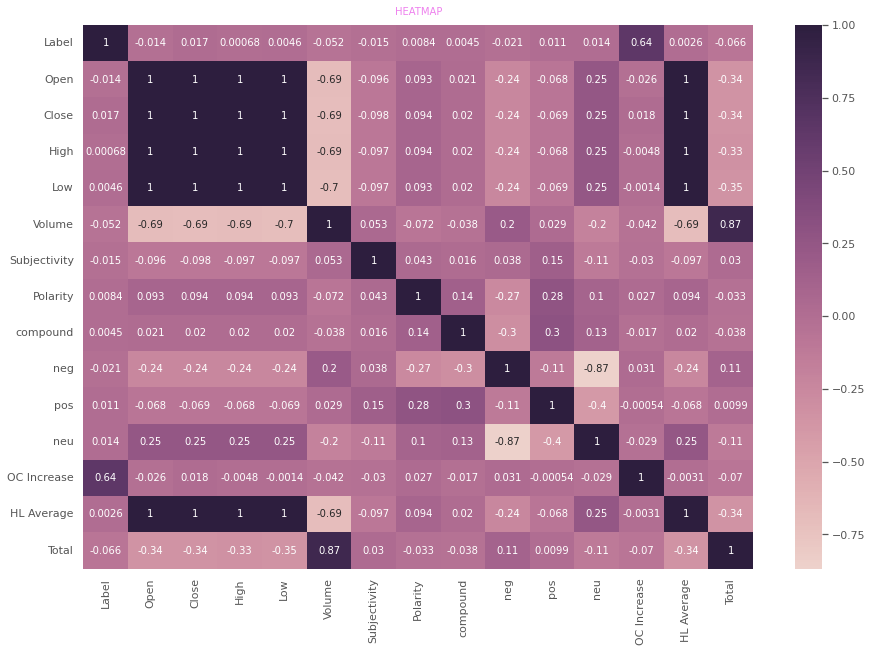

In [154]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("HEATMAP", fontsize = 10, color = 'violet', pad = 10, loc = 'center')
plt.show()

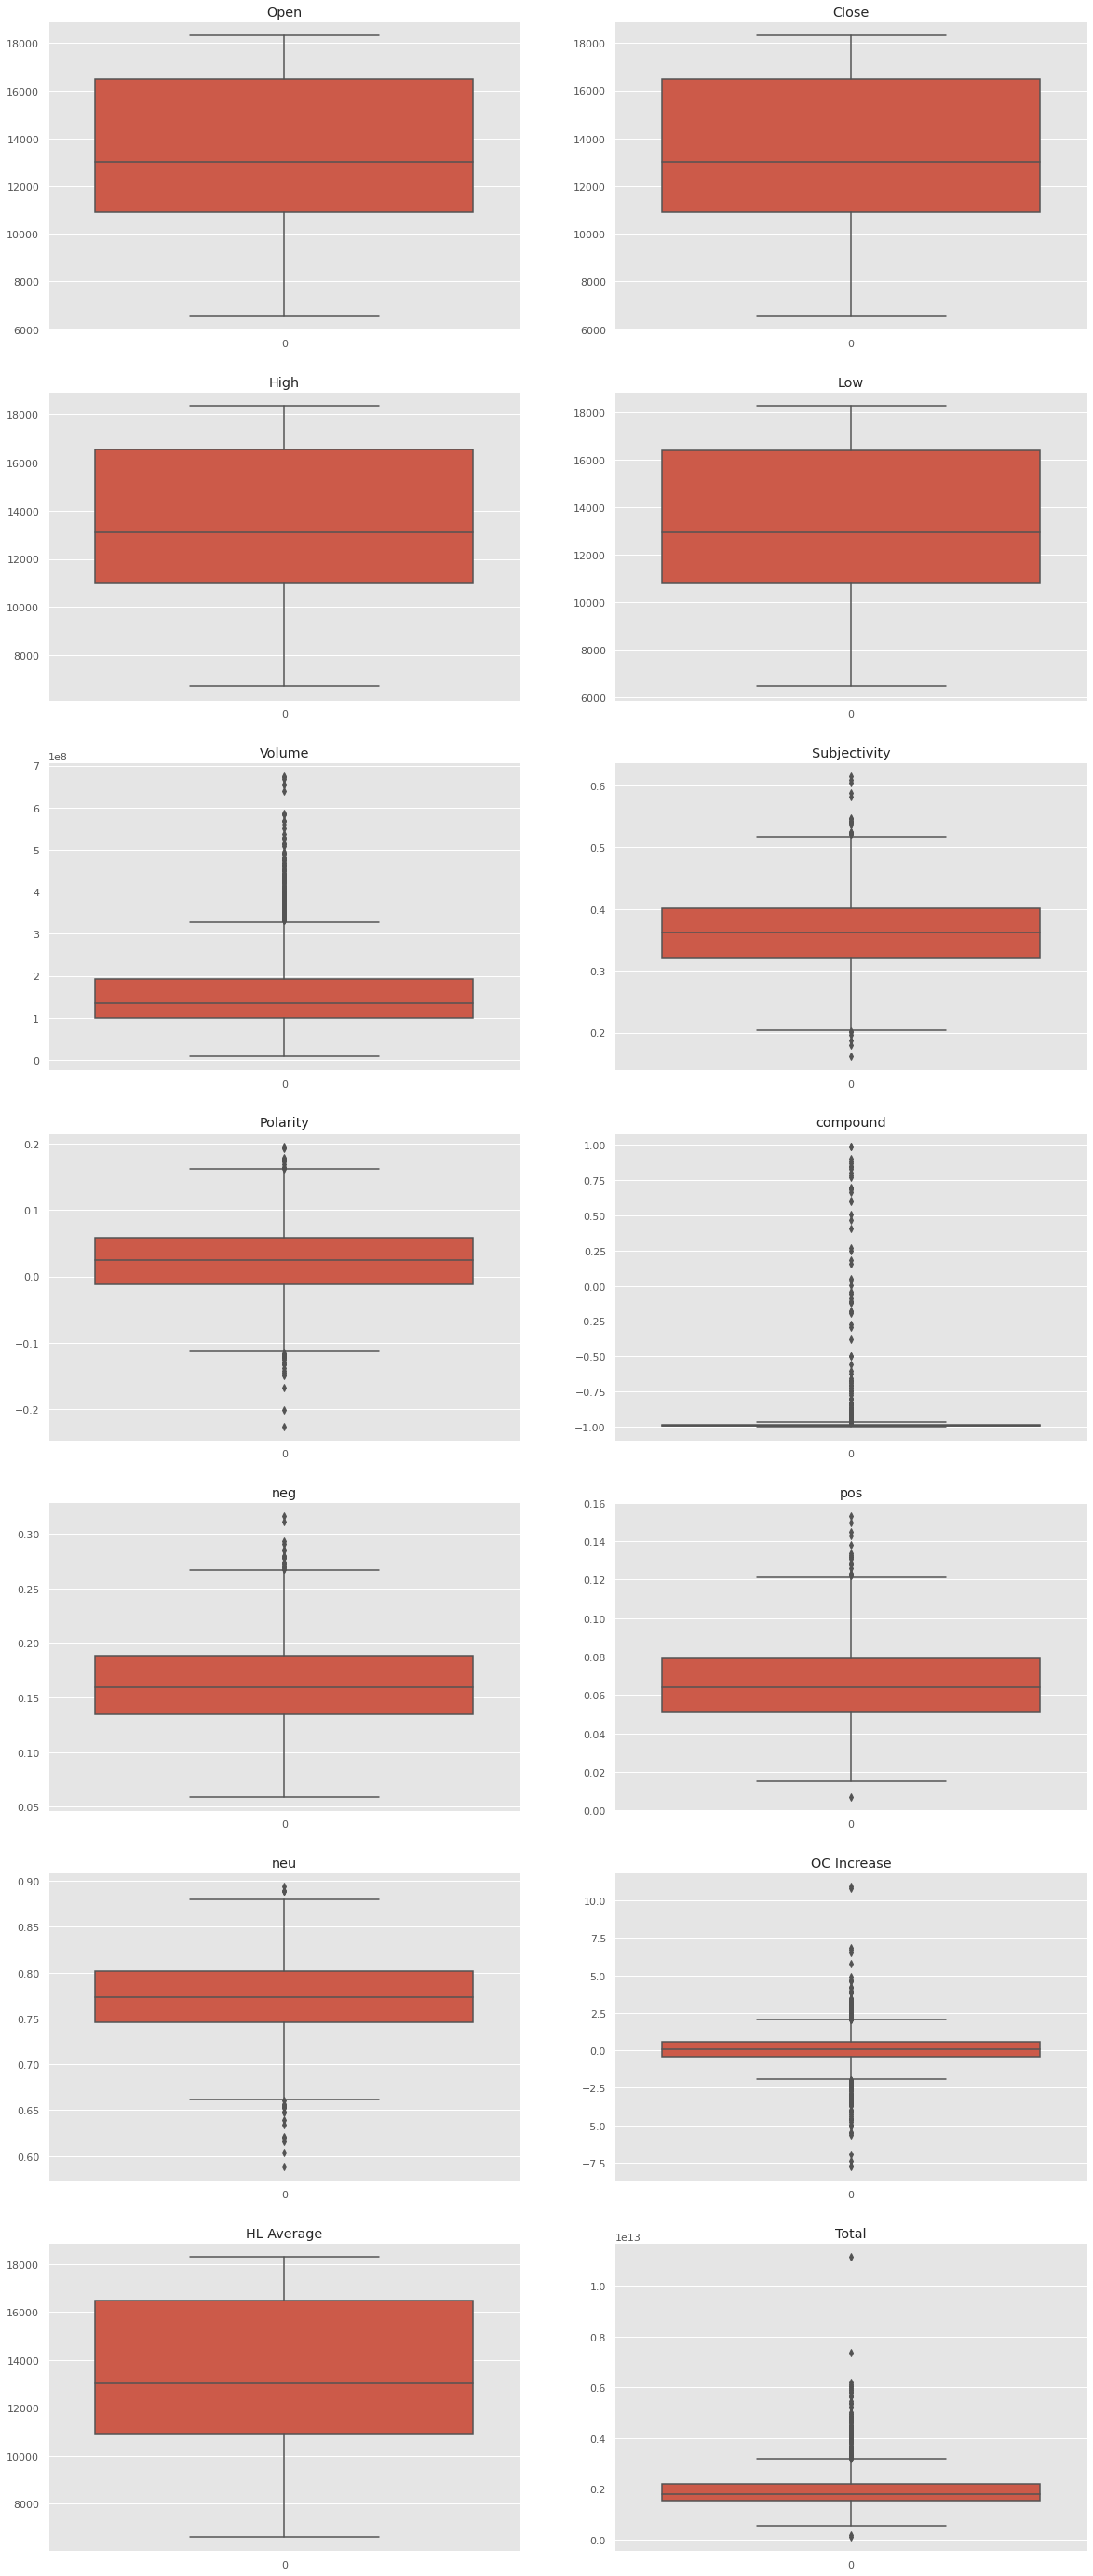

In [155]:
#df1= merge[['Date','Label',,,, , ,'Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
templ=['Open','Close','High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu','OC Increase','HL Average','Total']
k=0
fig, axes = plt.subplots(7,2, figsize=(20, 50))
for i in range(7):
    for j in range(2):
        sns.boxplot(data=df[templ[k]],ax=axes[i, j],)
        axes[i,j].set_title(templ[k])
        k+=1

<AxesSubplot:>

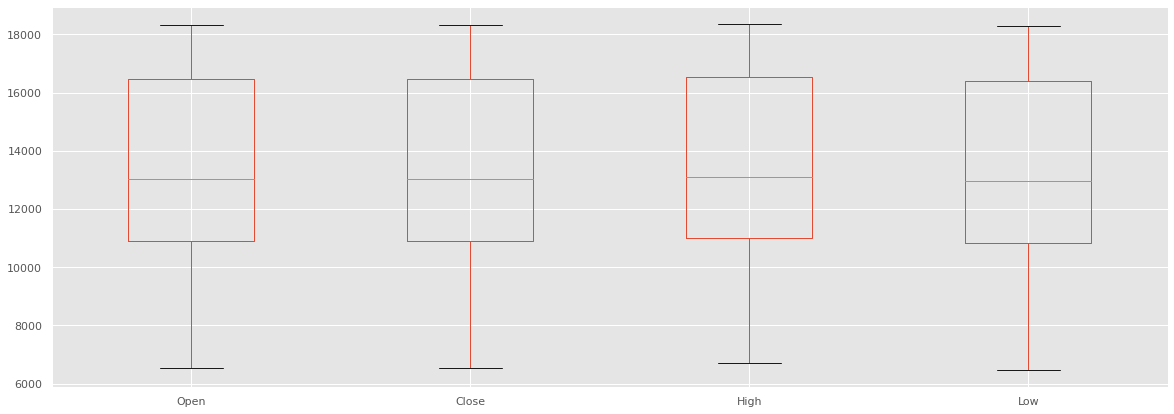

In [156]:
df[['Open','Close','High', 'Low']].boxplot(figsize=(20,7))



<AxesSubplot:>

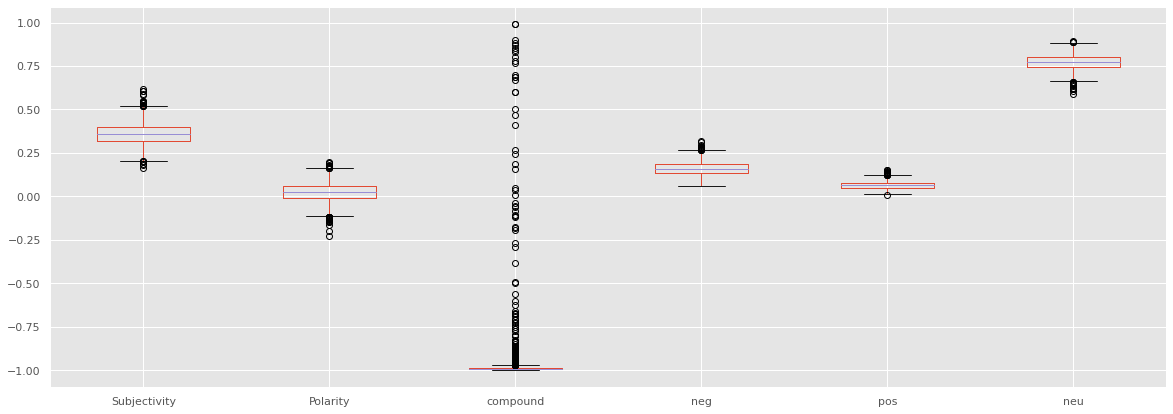

In [157]:
df[['Subjectivity','Polarity','compound','neg','pos','neu']].boxplot(figsize=(20,7))


<AxesSubplot:>

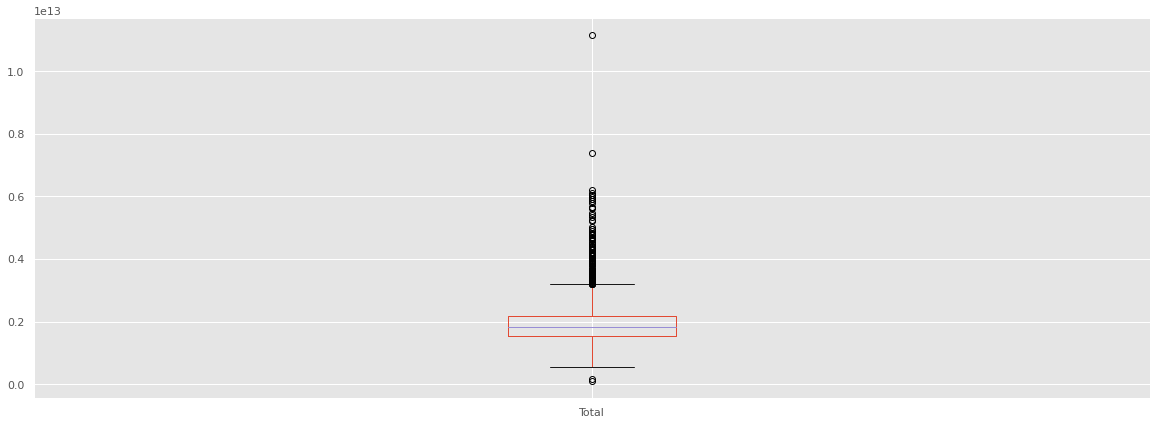

In [158]:
df[['Total']].boxplot(figsize=(20,7))

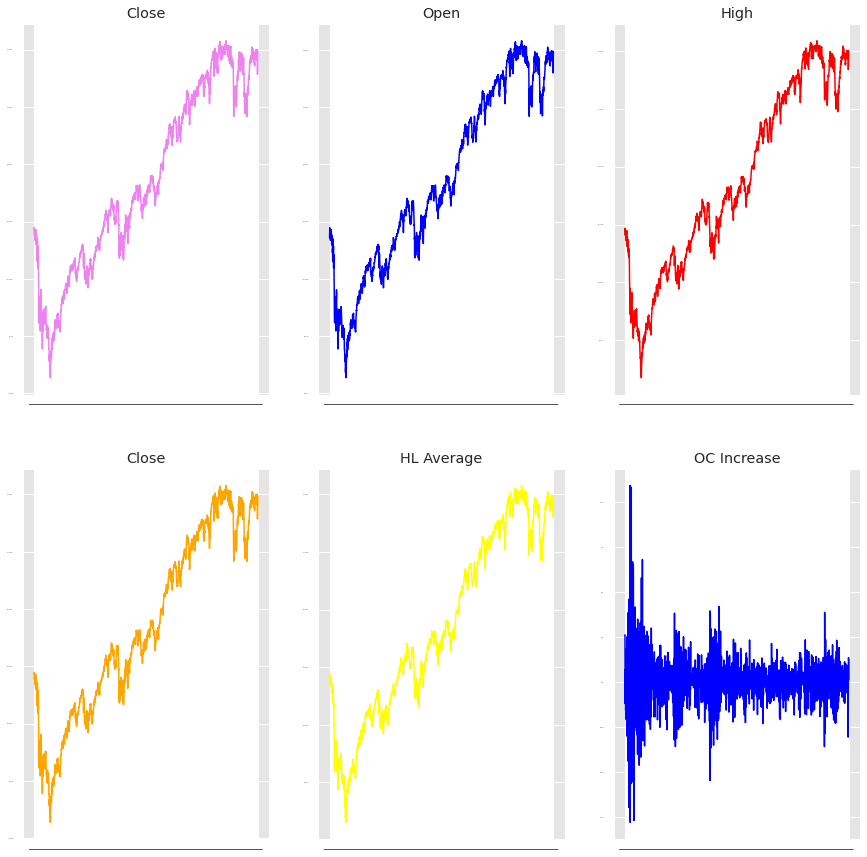

In [159]:
figure,axis= plt.subplots(2,3,figsize=(15,15))


axis[0,0].plot(df["Date"],df["Close"], color='violet')
axis[0,0].set_title("Close")
axis[0,0].tick_params(axis='x', labelsize=2)
axis[0,0].tick_params(axis='y', labelsize=2)


axis[0,1].plot(df["Date"],df["Open"], color='blue')
axis[0,1].set_title("Open")
axis[0,1].tick_params(axis='x', labelsize=2)
axis[0,1].tick_params(axis='y', labelsize=2)

axis[0,2].plot(df["Date"],df["High"], color='red')
axis[0,2].set_title("High")
axis[0,2].tick_params(axis='x', labelsize=2)
axis[0,2].tick_params(axis='y', labelsize=2)

axis[1,0].plot(df["Date"],df["Close"], color='orange')
axis[1,0].set_title("Close")
axis[1,0].tick_params(axis='x', labelsize=2)
axis[1,0].tick_params(axis='y', labelsize=2)

axis[1,1].plot(df["Date"],df["HL Average"], color='yellow')
axis[1,1].set_title("HL Average")
axis[1,1].tick_params(axis='x', labelsize=2)
axis[1,1].tick_params(axis='y', labelsize=2)

axis[1,2].plot(df["Date"],df["OC Increase"], color='blue')
axis[1,2].set_title("OC Increase")
axis[1,2].tick_params(axis='x', labelsize=2)
axis[1,2].tick_params(axis='y', labelsize=2)

plt.show()

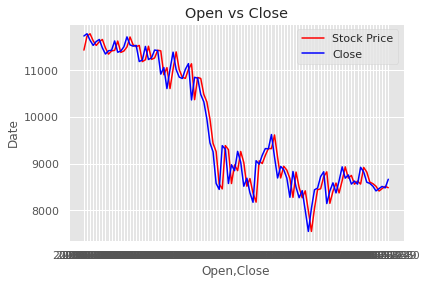

In [160]:
df6=df.iloc[:100,:]

plt.plot(df6["Date"],df6["Open"],color="red",label="Stock Price")
plt.plot(df6["Date"],df6["Close"] ,color="blue", label="Close")
plt.xlabel("Open,Close")
plt.ylabel("Date")

plt.legend()
plt.title("Open vs Close")
plt.show()

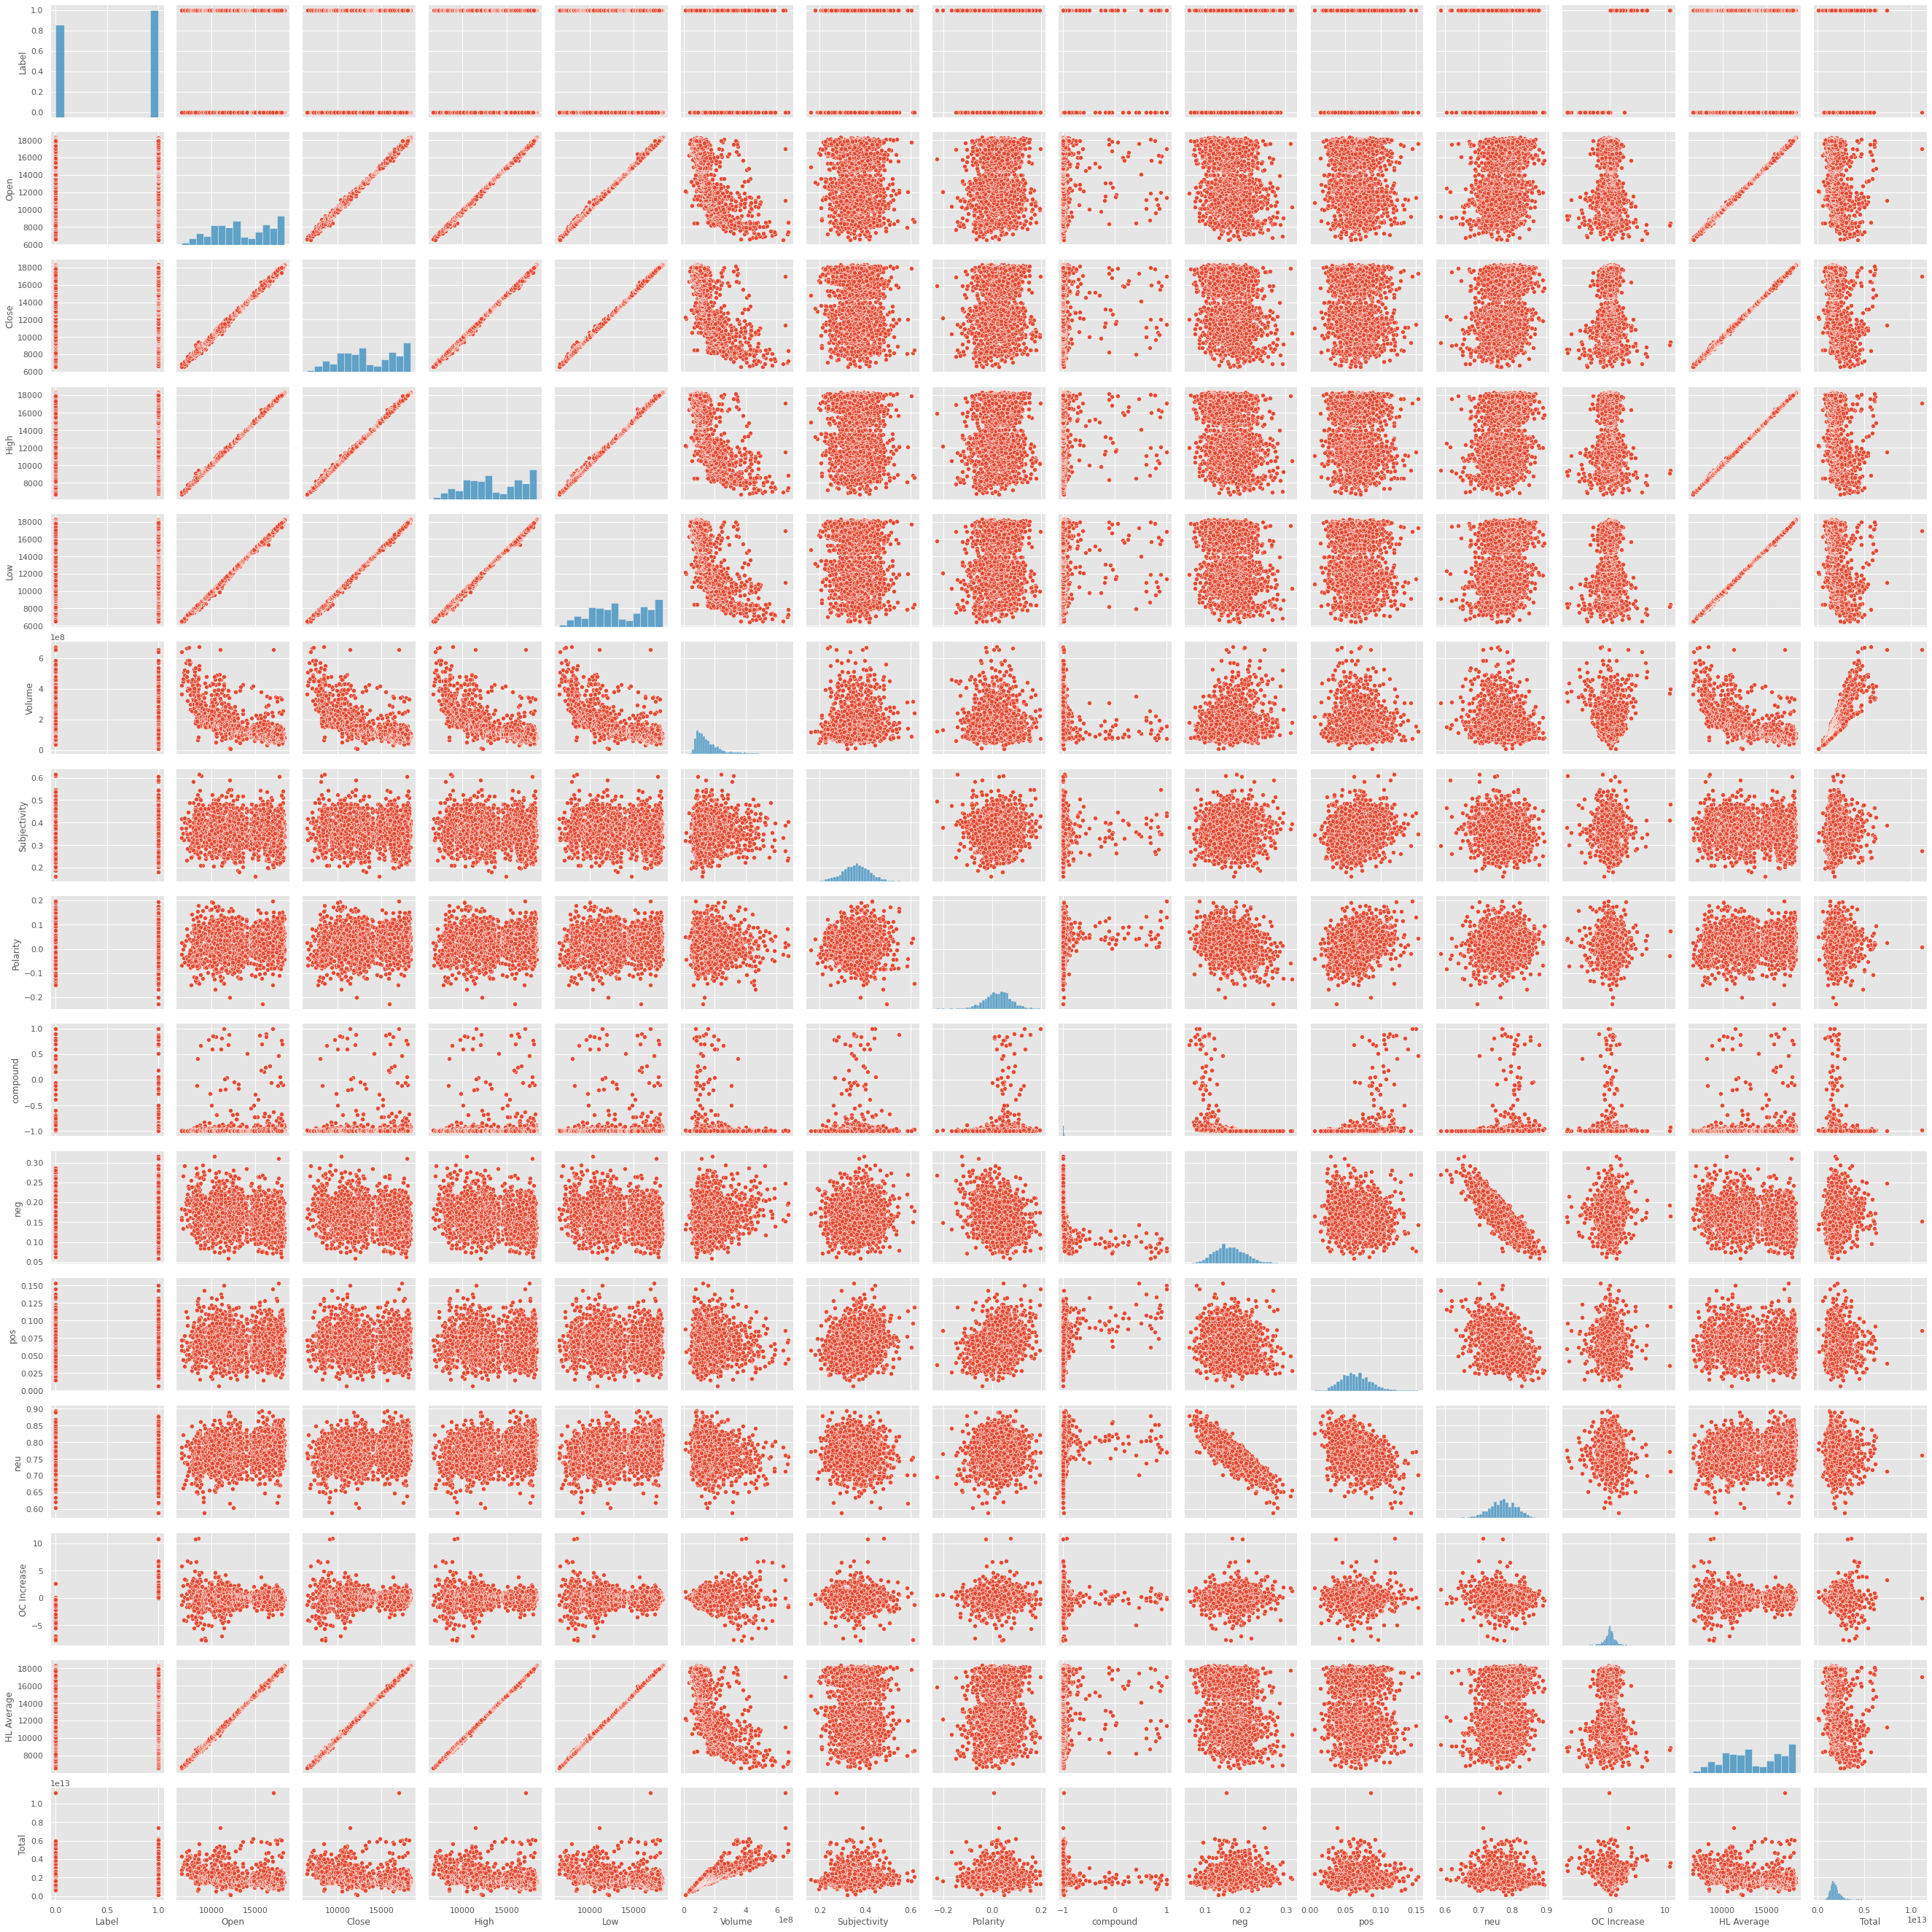

In [161]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Volume', ylabel='Total'>

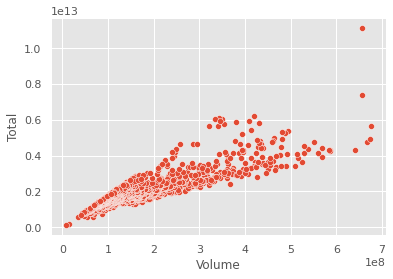

In [162]:
sns.scatterplot(data=df,x='Volume',y='Total')

<AxesSubplot:xlabel='High', ylabel='Close'>

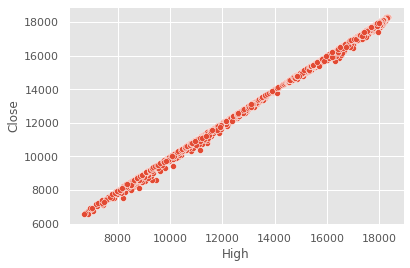

In [163]:
sns.scatterplot(data=df,x='High',y='Close')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

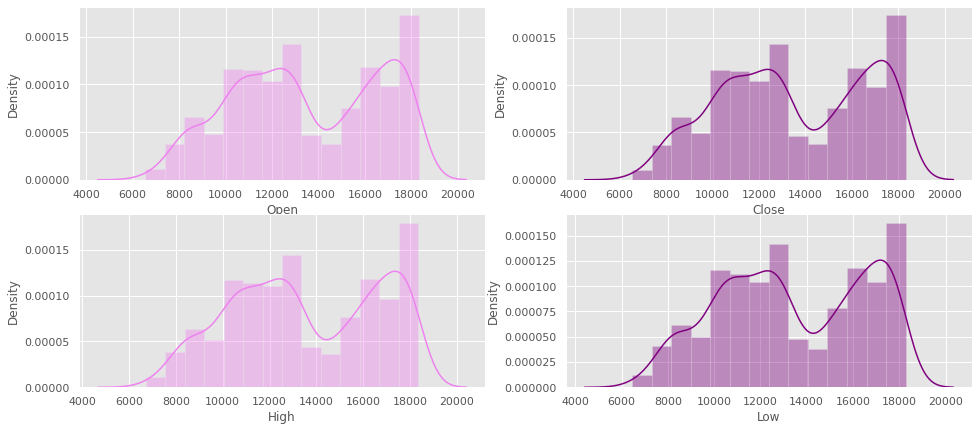

In [164]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
sns.distplot(df['Open'], color='violet')
plt.subplot(2,2,2)
sns.distplot(df['Close'], color='purple')

plt.subplot(2,2,3)
sns.distplot(df['High'], color='violet')
plt.subplot(2,2,4)
sns.distplot(df['Low'], color='purple')
plt.show()

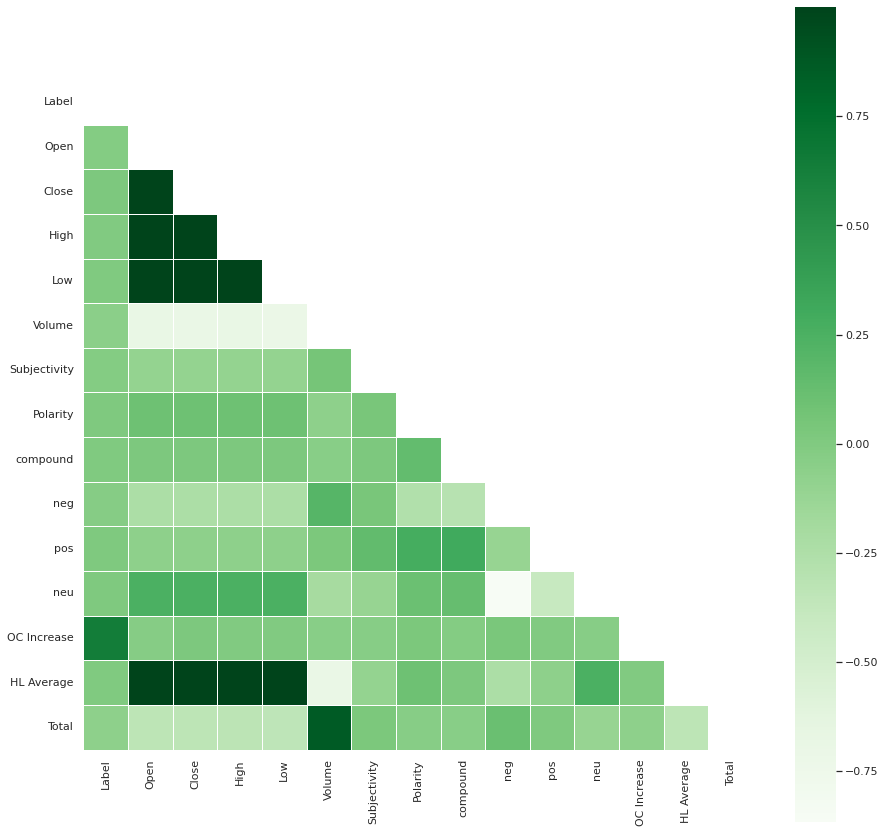

In [165]:
correlations = df.corr()
hm = np.zeros_like(correlations)
hm[np.triu_indices_from(hm)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations,mask=hm,square=True,linewidths=.8,cmap="Greens")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



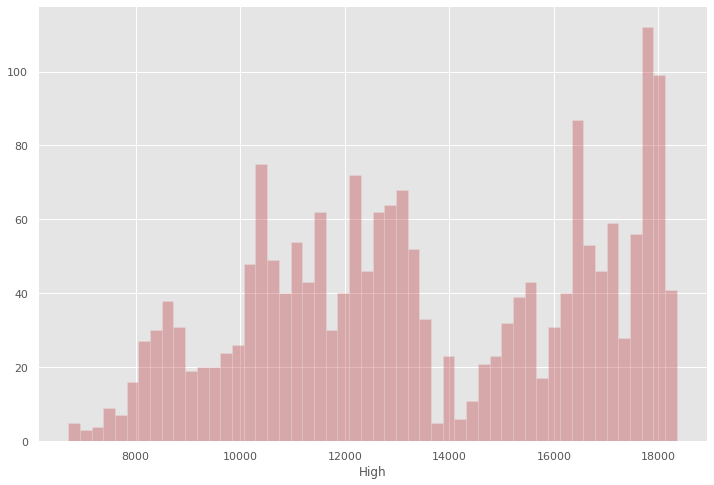

In [166]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.High
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'r')


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



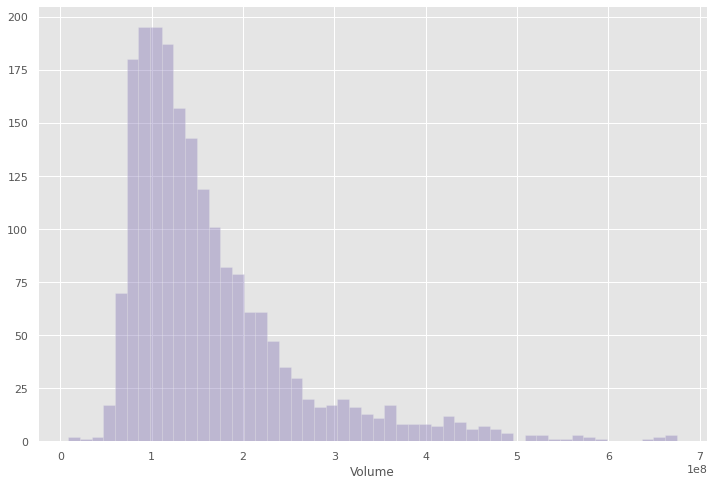

In [167]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Volume
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'm')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



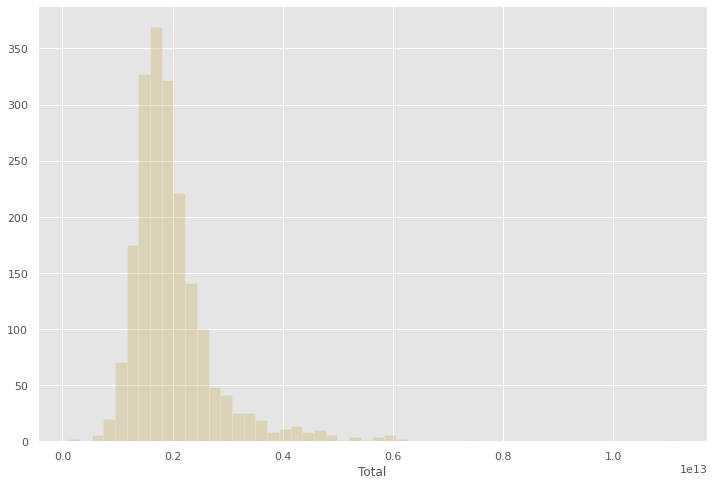

In [168]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Total
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'y')

In [169]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df.iloc[:,2:] = scaler.fit_transform(df.iloc[:,2:])
#df

# Sampling

In [170]:
X=df.copy()
X=np.array(X.drop(['Label','Date','Close'],1))
#X=np.array(X.drop(['Label','neg','pos','neu','compound','Polarity','Subjectivity','Date'],1))
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array([[ 1.14320898e+04,  1.17599600e+04,  1.13880400e+04, ...,
         2.64370270e+00,  1.15740000e+04,  2.46329442e+12],
       [ 1.17296699e+04,  1.18671104e+04,  1.16755303e+04, ...,
         4.49114829e-01,  1.17713203e+04,  2.15638817e+12],
       [ 1.17817002e+04,  1.17823496e+04,  1.16015195e+04, ...,
        -1.18175192e+00,  1.16919346e+04,  2.02960292e+12],
       ...,
       [ 1.74560195e+04,  1.77045098e+04,  1.74560195e+04, ...,
         1.36720835e+00,  1.75802646e+04,  1.87018855e+12],
       [ 1.77127598e+04,  1.79306094e+04,  1.77118008e+04, ...,
         1.22640667e+00,  1.78212051e+04,  2.37075491e+12],
       [ 1.79242402e+04,  1.80023809e+04,  1.79169102e+04, ...,
         1.40195103e-01,  1.79596455e+04,  1.47556447e+12]])

In [171]:
y= np.array(df['Close'])
y

array([11734.320312, 11782.349609, 11642.469727, ..., 17694.679688,
       17929.990234, 17949.369141])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Regression Testing**

In [173]:
from sklearn import metrics
def Test(y_test,predictions,dframe):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R Square Error:', metrics.r2_score(y_test, predictions))
    graph = dframe.head(10)
    graph.plot(kind='bar')
    plt.title('Actual VS Prediction')
    plt.ylabel('Opening Value')
    df6=df.iloc[:100,:]
    fig = plt.figure()
    plt.plot(dframe.index,dframe["Actual"],color="red",label="Actual")
    plt.plot(dframe.index,dframe["Predicted"] ,color="blue", label="Predicted")
    plt.xlabel("Actual,Predicted")
    plt.ylabel("X")
    plt.legend()
    plt.title("Actual VS Prediction")
    plt.show()

# **LINEAR REGRESSION**

* OSL
* GDM
* Classical

# **OLS**

In [174]:
def OSL(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    num=0
    den=0
    for i in range(len(X)):
        num += (X[i] - X_mean)*(Y[i]-Y_mean)
        den += (X[i] - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    return (m,c)

**OSL AVG vs CLOSE**

Intercept:  1.33589135310649
Slope:  1.000280134228127
Mean Absolute Error: 53.237010044625684
Mean Squared Error: 6212.826444686534
Root Mean Squared Error: 78.82148466431303
R Square Error: 0.99939125320899


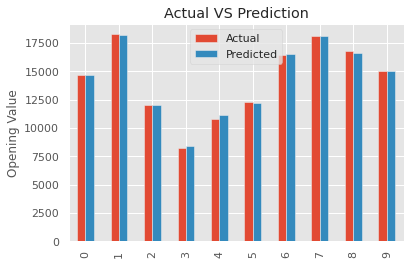

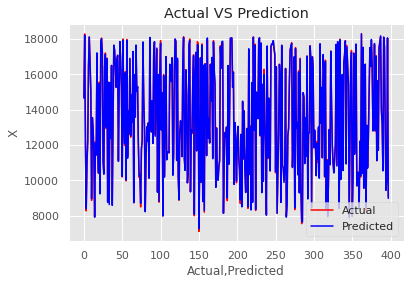

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [175]:
m,c=OSL(X_train.T[-2],y_train)
y_pred=m*X_test.T[-2]+c
print('Intercept: ', c)
print('Slope: ', m)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds
Test(y_test,y_pred,df_preds)
plt.scatter

**OSL HC Diff vs CLOSE**

Intercept:  13446.442057658047
Slope:  80.01613015731992
           Actual     Predicted
0    14673.459961  13479.283836
1    18288.630859  13514.650203
2    12021.389648  13341.543230
3     8273.580078  13238.029062
4    10809.849609  13009.702685
..            ...           ...
393  13177.679688  13585.110341
394   9505.959961  13581.772694
395  10040.450195  13342.145825
396  18039.369141  13463.377437
397   9069.290039  13614.883086

[398 rows x 2 columns]
Mean Absolute Error: 2833.0420146693696
Mean Squared Error: 10244604.335201668
Root Mean Squared Error: 3200.7193465222263
R Square Error: -0.0037895102564942107


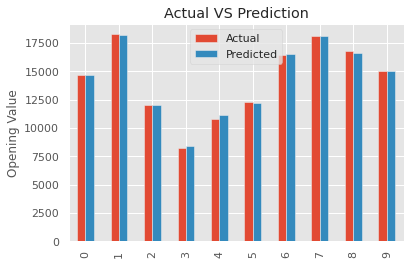

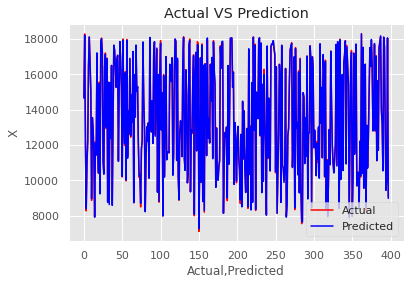

In [176]:
m,c=OSL(X_train.T[-3],y_train)
y_pred=m*X_test.T[-3]+c
print('Intercept: ', c)
print('Slope: ', m)
df_preds1 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds1)
Test(y_test,y_pred,df_preds)

# **Gradient Descent**

In [177]:
'''
def sum1(Y,Y_pred,X):
    num=0
    for i in range(len(X)):
        num += (X[i])*(Y[i]-Y_pred[i])
    return num
def GDM(X,Y,Iter,L):
    m=0
    c=0
    n=len(X)
    for i in range(Iter):
        Y_pred=m*X+c
        D_m=(-2/n)*(sum1(Y,Y_pred,X))
        D_c=(-2/n)*(sum(Y-Y_pred))
        m=m-D_m*L
        c=c-D_c*L
    return m,c'''

'\ndef sum1(Y,Y_pred,X):\n    num=0\n    for i in range(len(X)):\n        num += (X[i])*(Y[i]-Y_pred[i])\n    return num\ndef GDM(X,Y,Iter,L):\n    m=0\n    c=0\n    n=len(X)\n    for i in range(Iter):\n        Y_pred=m*X+c\n        D_m=(-2/n)*(sum1(Y,Y_pred,X))\n        D_c=(-2/n)*(sum(Y-Y_pred))\n        m=m-D_m*L\n        c=c-D_c*L\n    return m,c'

In [178]:
'''m,c=GDM(X_train.T[-2],y_train,1000,0.0001)
y_pred=m*X_test.T[-2]+c
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
#print(df_preds2)
Test(y_test,y_pred)'''
    

"m,c=GDM(X_train.T[-2],y_train,1000,0.0001)\ny_pred=m*X_test.T[-2]+c\ndf_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})\n#print(df_preds2)\nTest(y_test,y_pred)"

# **Sklearn Linear Regression**

Intercept:  [1.33589135]
Slope:  [[1.00028013]]
Mean Absolute Error: 53.23701004462581
Mean Squared Error: 6212.8264446865405
Root Mean Squared Error: 78.82148466431308
R Square Error: 0.99939125320899


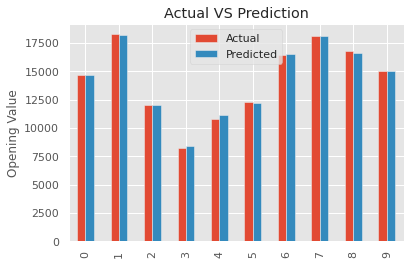

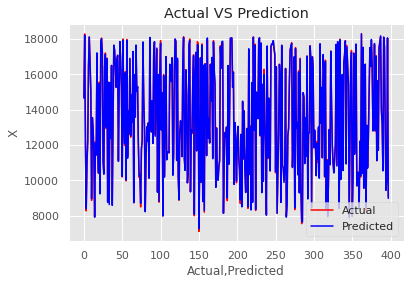

In [179]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression(fit_intercept =True)
regressor.fit(np.array((X_train.T[-2]).reshape(len(X_train.T[-2]),1)),np.array(y_train.reshape(len(X_train.T[-2]),1)))
print('Intercept: ', regressor.intercept_)
print('Slope: ', regressor.coef_)
y_pred = regressor.predict(np.array((X_test.T[-2]).reshape(len(X_test.T[-2]),1)))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_test,y_pred,df_preds2)

Intercept:  [13446.44205766]
Slope:  [[80.01613016]]
Mean Absolute Error: 2833.0420146693696
Mean Squared Error: 10244604.335201666
Root Mean Squared Error: 3200.7193465222263
R Square Error: -0.0037895102564939886


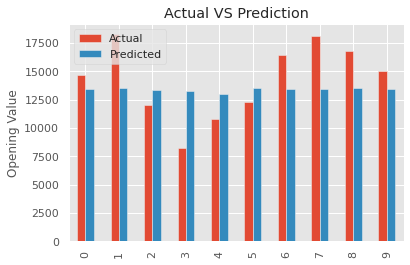

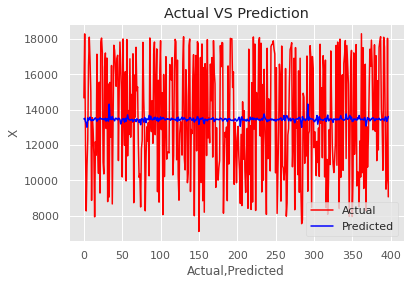

In [180]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression(fit_intercept =True)
regressor.fit(np.array((X_train.T[-3]).reshape(len(X_train.T[-3]),1)),np.array(y_train.reshape(len(X_train.T[-3]),1)))
print('Intercept: ', regressor.intercept_)
print('Slope: ', regressor.coef_)
y_pred = regressor.predict(np.array((X_test.T[-3]).reshape(len(X_test.T[-3]),1)))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_test,y_pred,df_preds2)

# **MultiLinear Regression**

# **Matrix**

In [181]:
X=np.array(X_train)
X = np.c_[np.ones((len(X), 1)), X]
y=np.array(y_train)
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([ 1.09592824e+04, -6.45215475e-01,  1.00108402e+00,  2.33726415e-01,
        1.68695076e-08,  2.14210010e+00, -1.59714982e+01, -4.37182335e-01,
        2.61711283e+02,  2.34147057e+02,  2.69520712e+02,  7.64492950e+01,
        3.36944509e-01, -4.43722167e-12])

Mean Absolute Error: 10122.630552968349
Mean Squared Error: 120627529.99348591
Root Mean Squared Error: 10983.056495961673
R Square Error: -10.819358297669991


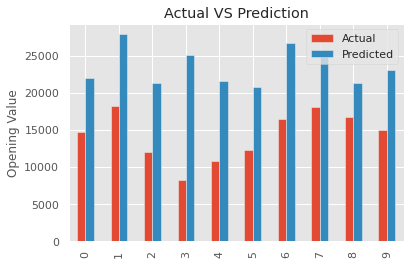

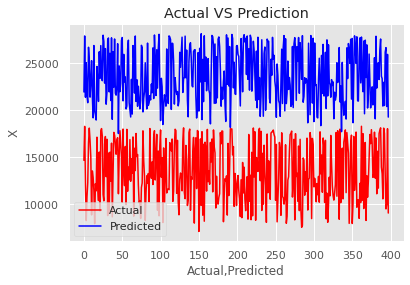

In [182]:
y_pred=[]
X_t=np.array(X_train)
X_t=np.c_[np.ones((len(X_t), 1)), X_t]
for i in range(len(y_test)):
    y_pred.append(X_t[i].dot(theta_best))
df_preds3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_preds3
Test(y_test,y_pred,df_preds3)

# **Stochastic Gradient Descent**

Mean Absolute Error: 22.23282192074171
Mean Squared Error: 1074.5454958233133
Root Mean Squared Error: 32.78026076502921
R Square Error: 0.9998947136012569


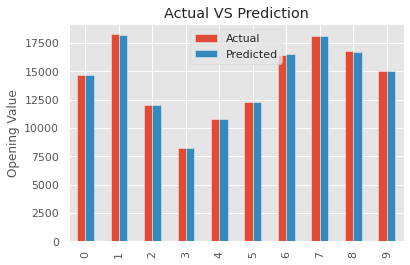

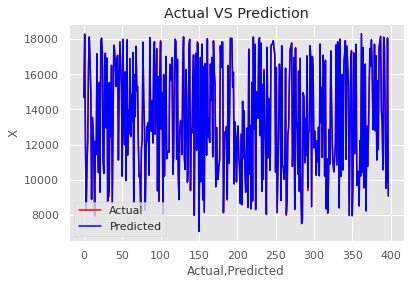

In [183]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = np.array(y_train)
X = np.array(X_train)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)
y_pred=reg.predict(np.array(X_test))
df_preds2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Test(y_test,y_pred,df_preds2)

# **Classical SKLEARN Method**

Intercept:  -261.221836776298
Slope:  [ 4.22010417e-01  2.10801293e-01  1.95169772e-01  1.68694140e-08
  2.14209789e+00 -1.59714984e+01 -4.37182569e-01  2.61711353e+02
  2.34147125e+02  2.69520783e+02  7.64492951e+01  1.72150867e-01
 -4.43720061e-12]
Mean Absolute Error: 21.573178839726772
Mean Squared Error: 1082.6598415277017
Root Mean Squared Error: 32.90379676462432
R Square Error: 0.9998939185393069


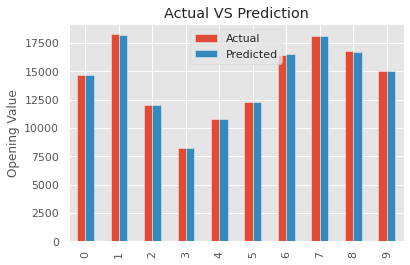

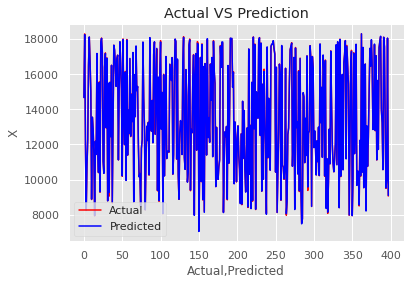

In [184]:
#
from sklearn.linear_model import LinearRegression
regressor= LinearRegression(fit_intercept =True)
regressor.fit(np.array(X_train),np.array(y_train))
print('Intercept: ', regressor.intercept_)
print('Slope: ', regressor.coef_)
y_pred = regressor.predict(np.array(X_test))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_test,y_pred,df_preds2)

# **KNN**

Mean Absolute Error: 2770.6513322173364
Mean Squared Error: 11677066.810866365
Root Mean Squared Error: 3417.172341405444
R Square Error: -0.14414542443929101


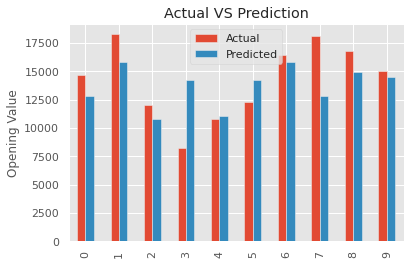

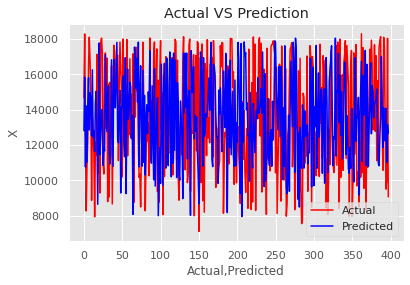

In [185]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(np.array(X_train),np.array(y_train))
y_pred = neigh.predict(np.array(X_test))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_test,y_pred,df_preds2)

# **SVM**

Mean Absolute Error: 2660.2555141901344
Mean Squared Error: 9455046.537962064
Root Mean Squared Error: 3074.905939693451
R Square Error: -311.89268182348974


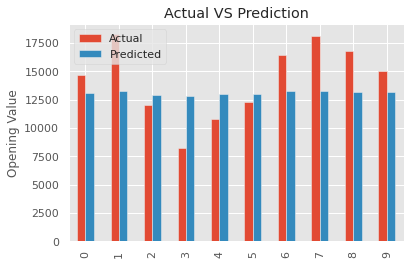

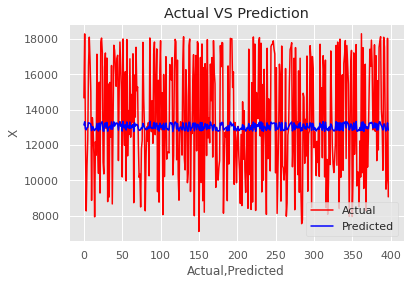

In [186]:
import numpy as np
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(42)
y = np.array(y_train)
X = np.array(X_train)
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
reg.fit(X, y)
y_pred=reg.predict(np.array(X_test))
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_pred,y_test,df_preds) 


# **Decision Tree Regressor**

Mean Absolute Error: 53.88858960804017
Mean Squared Error: 6572.429605690109
Root Mean Squared Error: 81.07052242147024
R Square Error: 0.9993590996217815


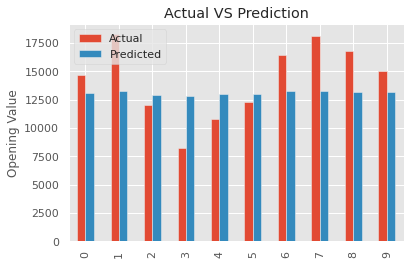

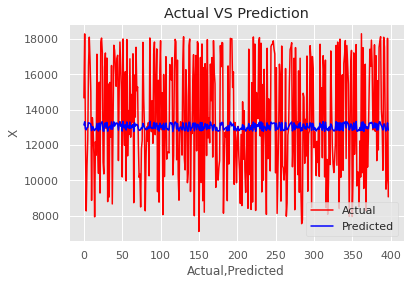

In [187]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X, y)
y_pred=reg.predict(np.array(X_test))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_pred,y_test,df_preds) 


Mean Absolute Error: 53.88858960804017
Mean Squared Error: 6572.429605690109
Root Mean Squared Error: 81.07052242147024
R Square Error: 0.9993590996217815


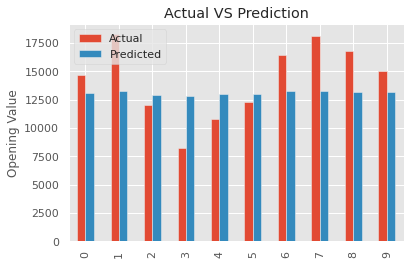

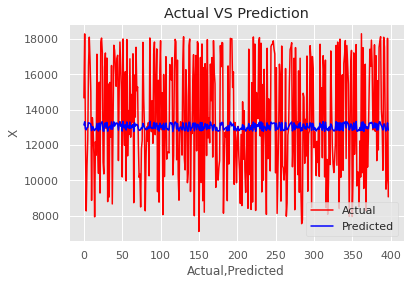

In [188]:
#Random Forest 
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X, y)
y_pred=reg.predict(np.array(X_test))
df_preds2 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
Test(y_pred,y_test,df_preds)

# ****Classification****

In [189]:
X1=df.copy()
X1=np.array(X1.drop(['Label','Date'],1))
Y1=np.array(df['Label'])
x_train, x_test, Y_train, Y_test= train_test_split(X1,Y1, test_size=0.2, random_state= 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [190]:
x_train.shape

(1591, 14)

In [191]:
!pip install scikit-plot


In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
Name2=[]
Precision=[]
Recall=[]
Accuracy=[]

value=1.5
width=0.75
d1={i : value for i in range(2,10)}
d2={i : value for i in range(2,10)}
def TestC(M):
    y_pred = M.predict(x_test)
    print(y_pred)
    r=recall_score(Y_test, y_pred)
    a=accuracy_score(Y_test, y_pred)
    p=precision_score(Y_test, y_pred)
    print('Accuracy:', a)
    print('Precision:', p)
    print('Recall:',r)
    plot_confusion_matrix(Y_test,y_pred)
    plot_roc_curve(M,x_test,Y_test)
    fig=plt.figure()
    plot_decision_regions(x_train, Y_train, clf=M, 
                          filler_feature_values={2: value, 3: value, 4: value, 5: value,6: value, 7: value, 8: value, 9: value,10: value, 11: value, 12: value, 13: value},
                          filler_feature_ranges={2: width, 3: width, 4: width, 5: width,6: width, 7: width, 8: width, 9: width,10: width, 11: width, 12: width, 13: width}
                          , legend=2)
    plt.show()
    Precision.append(p)
    Recall.append(r)
    Accuracy.append(a)

# **Logistic Regression**

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.5150753768844221
Precision: 0.5150753768844221
Recall: 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



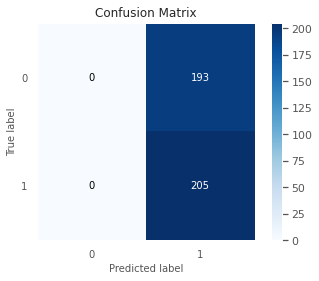

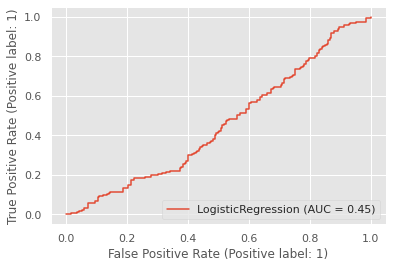

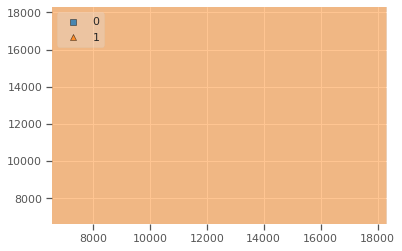

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
lr = LogisticRegression()
lr.fit(x_train, Y_train)
TestC(lr)
Name2.append('Logistic')

# **LinearDiscriminantAnalysis**

[1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.907035175879397
Precision: 0.8620689655172413
Recall: 0.975609756097561


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



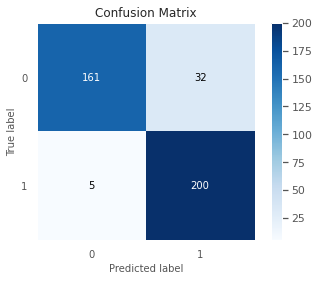

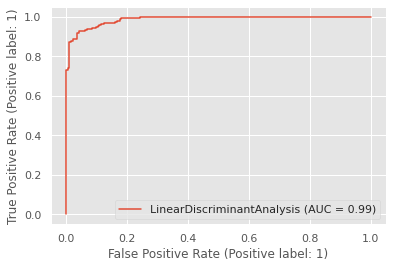

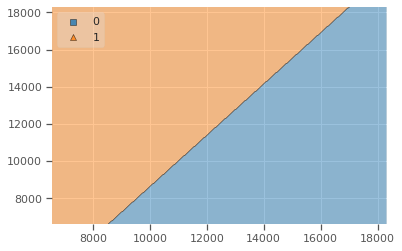

In [194]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis().fit(x_train, Y_train)
lda.fit(x_train, Y_train)
TestC(lda)
Name2.append('Linear Discriminant')

# **KNN**

[1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0
 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1]
Accuracy: 0.47738693467336685
Precision: 0.49321266968325794
Recall: 0.5317073170731708


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



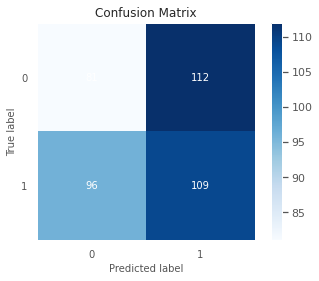

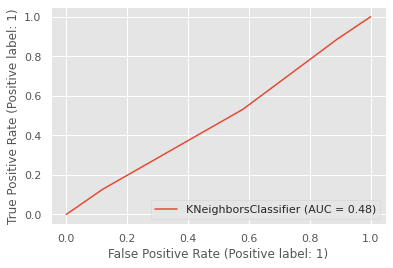

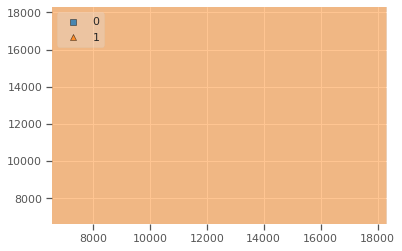

In [195]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, Y_train)
TestC(neigh)
Name2.append('KNN')

[1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1
 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1]
Accuracy: 0.5125628140703518
Precision: 0.5258215962441315
Recall: 0.5463414634146342


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



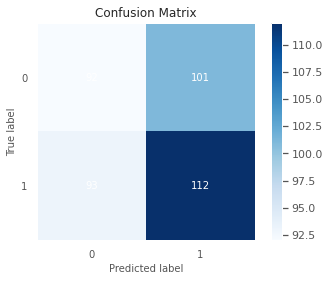

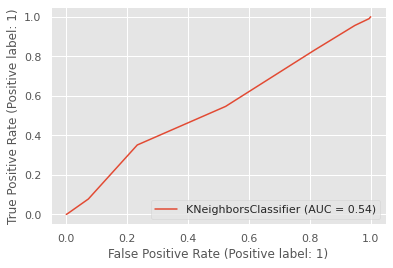

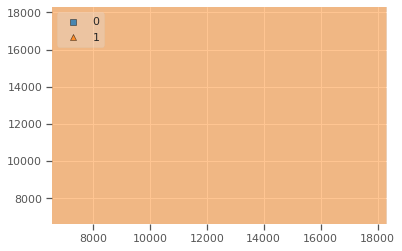

In [196]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, Y_train)
TestC(neigh)
Name2.append('KNN1')

[1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1]
Accuracy: 0.550251256281407
Precision: 0.5585585585585585
Recall: 0.6048780487804878


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



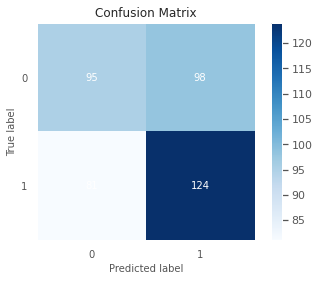

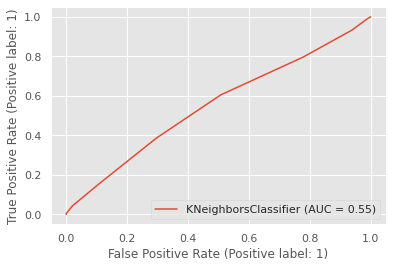

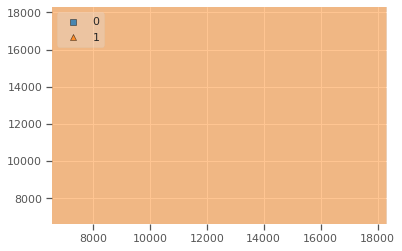

In [197]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(x_train, Y_train)
TestC(neigh)
Name2.append('KNN2')

# **NB**

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9874371859296482
Precision: 0.9807692307692307
Recall: 0.9951219512195122


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



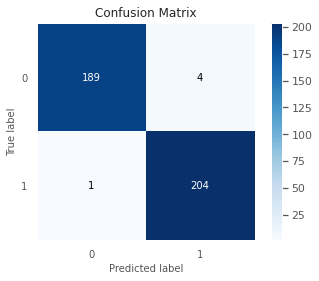

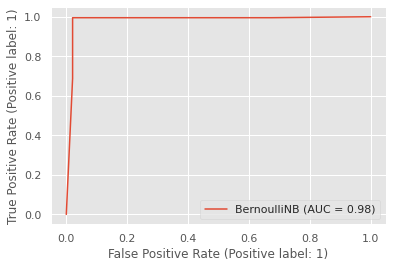

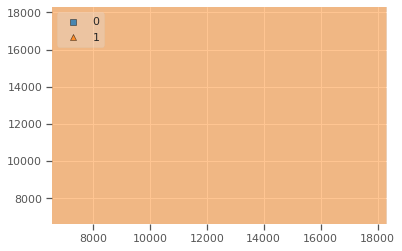

In [198]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, Y_train)
TestC(clf)
Name2.append('NB')

In [199]:
'''from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(x_train, Y_train)
TestC(clf)'''

'from sklearn.naive_bayes import ComplementNB\nclf = ComplementNB()\nclf.fit(x_train, Y_train)\nTestC(clf)'

# **Decision Tree**

[1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0]
Accuracy: 0.9748743718592965
Precision: 0.975609756097561
Recall: 0.975609756097561


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



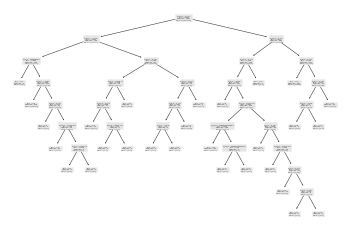

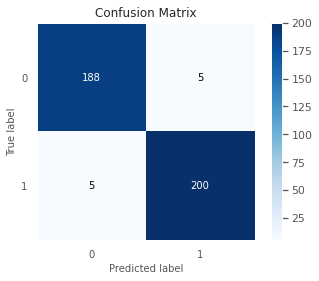

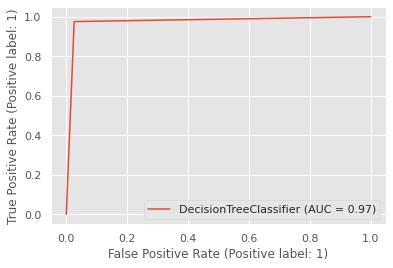

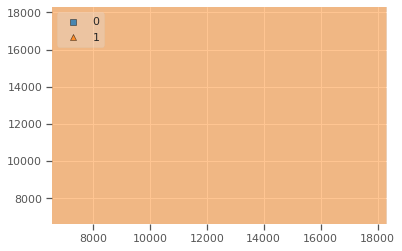

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42)
tree.plot_tree(clf.fit(x_train,Y_train))
TestC(clf)
Name2.append('DT1')

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0]
Accuracy: 0.9849246231155779
Precision: 0.9901477832512315
Recall: 0.9804878048780488


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



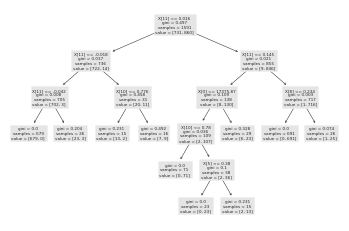

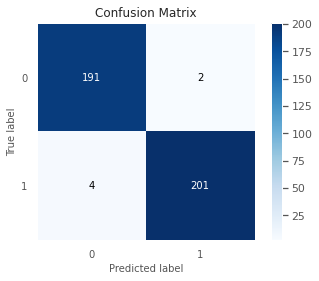

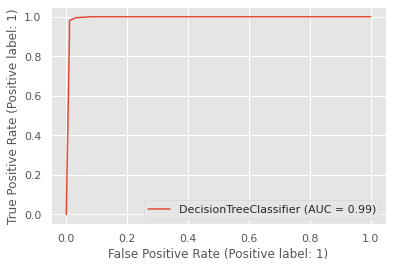

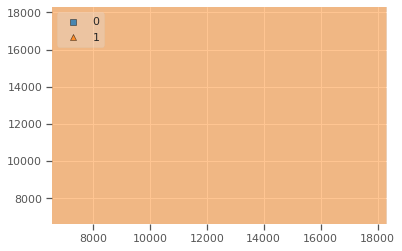

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=15)
tree.plot_tree(clf.fit(x_train,Y_train))
TestC(clf)
Name2.append('DT2')

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9900990099009901
Recall: 0.975609756097561


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



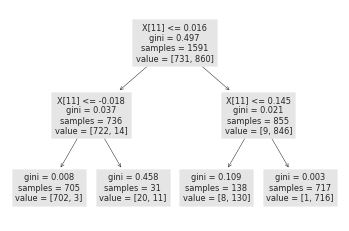

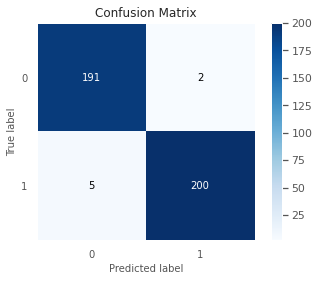

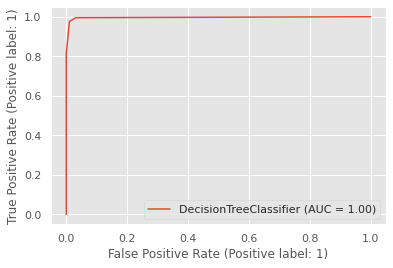

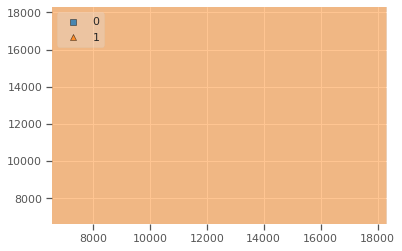

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42,max_depth=2)
tree.plot_tree(clf.fit(x_train,Y_train))
TestC(clf)
Name2.append('DT3')

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9900990099009901
Recall: 0.975609756097561


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



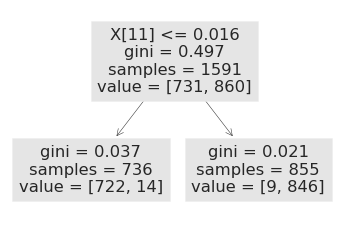

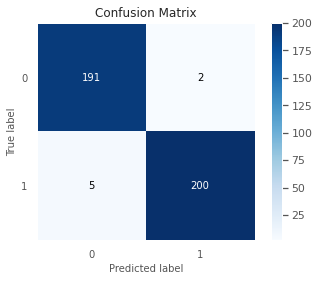

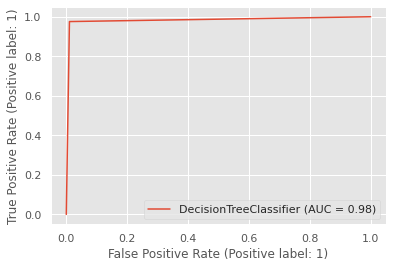

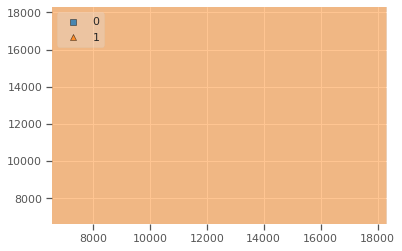

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42,max_depth=1)
tree.plot_tree(clf.fit(x_train,Y_train))
TestC(clf)
Name2.append('DT4')

# **Random Forest**

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9852941176470589
Recall: 0.9804878048780488


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



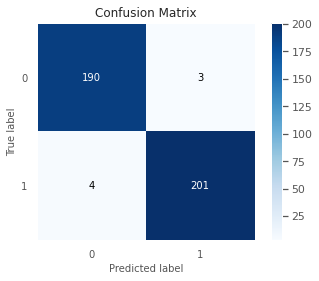

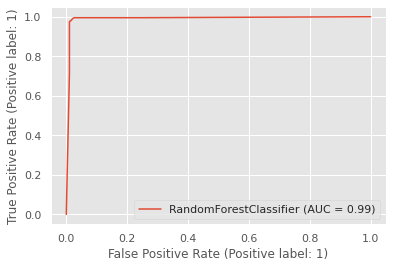

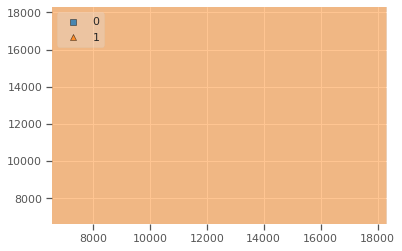

In [204]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1)
clf.fit(x_train, Y_train)
TestC(clf)

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9759615384615384
Recall: 0.9902439024390244


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



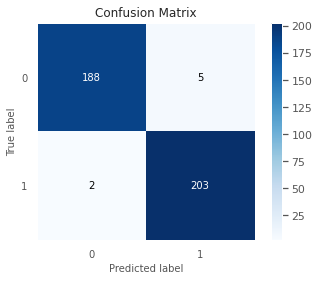

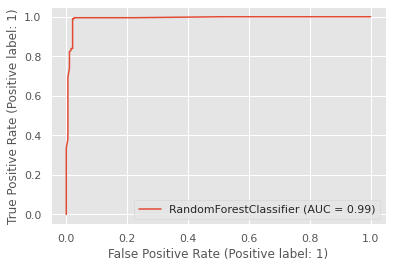

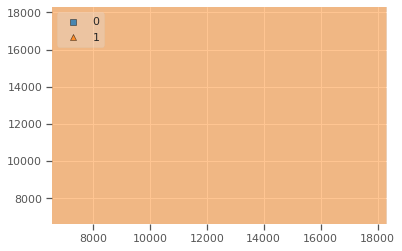

In [205]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,max_depth=2, random_state=42,n_jobs=-1)
clf.fit(x_train, Y_train)
TestC(clf)

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9759615384615384
Recall: 0.9902439024390244


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



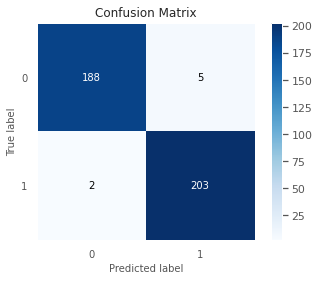

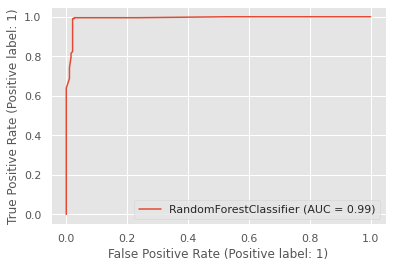

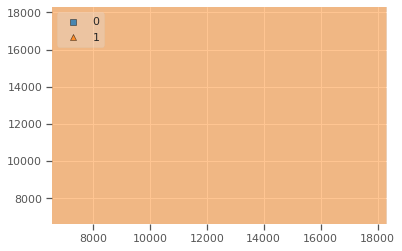

In [206]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,max_depth=2,criterion="entropy", random_state=42,n_jobs=-1,max_leaf_nodes=5)
clf.fit(x_train, Y_train)
TestC(clf)

# **Neural Networks (Perceptron)**

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9759615384615384
Recall: 0.9902439024390244


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



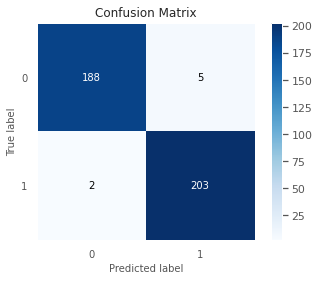

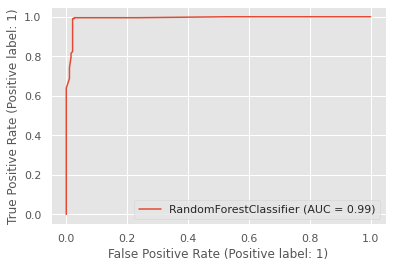

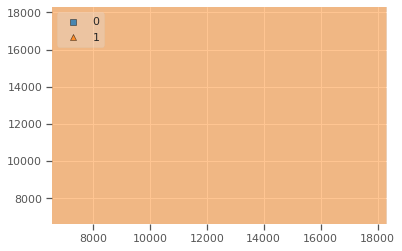

In [207]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
clf.fit(x_train, Y_train)
TestC(clf)

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9759615384615384
Recall: 0.9902439024390244


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



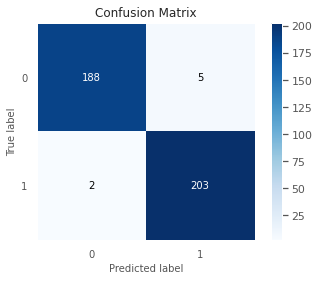

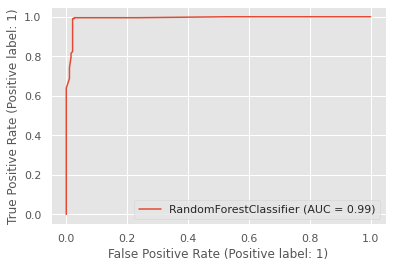

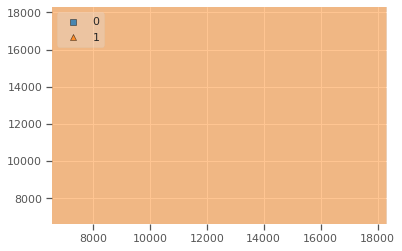

In [208]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2))
clf.fit(x_train, Y_train)
TestC(clf)

[1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0]
Accuracy: 0.9824120603015075
Precision: 0.9759615384615384
Recall: 0.9902439024390244


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning:

No contour levels were found within the data range.



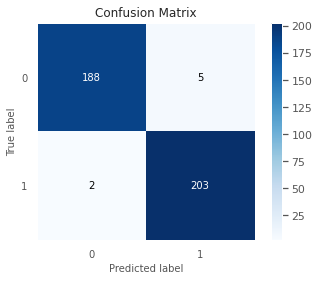

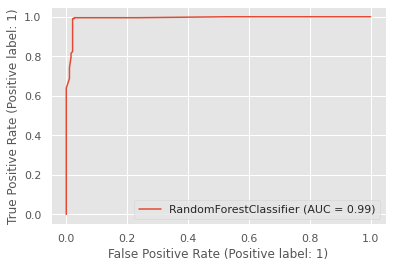

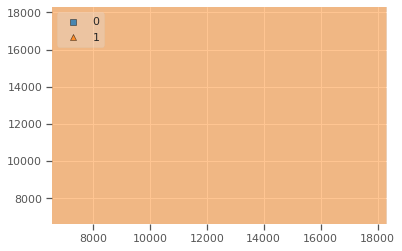

In [209]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),activation="logistic",learning_rate="adaptive",learning_rate_init=0.003,max_iter=300,random_state=42)
clf.fit(x_train, Y_train)
TestC(clf)

# **Candle Stick Plot**

In [210]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
 open=df.iloc[0:60]['Open'],
 high=df.iloc[0:60]['High'],
 low=df.iloc[0:60]['Low'],
 close=df.iloc[0:60]['Close'])])
fig.show()

In [211]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
 open=df['Open'],
 high=df['High'],
 low=df['Low'],
 close=df['Close'])])
fig.show()

# **UNSUPERVISED LEARNING**

# **Kmeans**

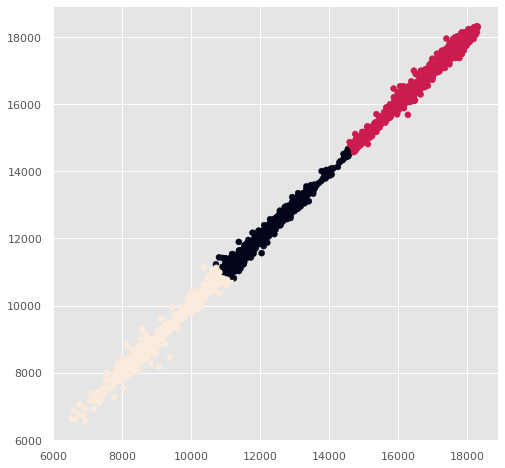

In [260]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=3)
clusters1 = kmeans1.fit_predict(df[["Open","Close"]])
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df["Close"], df["Open"], c=clusters1)
plt.show()


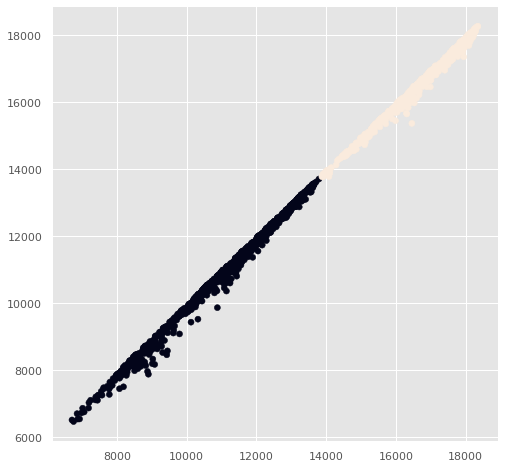

In [264]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
clusters1 = kmeans1.fit_predict(df[["High","Low"]])
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df["High"], df["Low"], c=clusters1)
plt.show()


              precision    recall  f1-score   support

           0       0.47      0.57      0.51       924
           1       0.54      0.44      0.48      1065

    accuracy                           0.50      1989
   macro avg       0.50      0.50      0.50      1989
weighted avg       0.50      0.50      0.50      1989



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

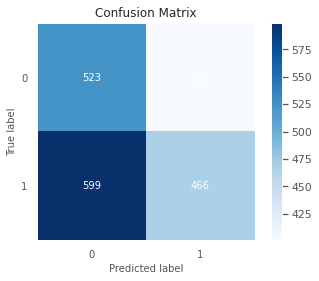

In [265]:
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
print(classification_report(df["Label"],clusters1))
plot_confusion_matrix(df["Label"],clusters1)

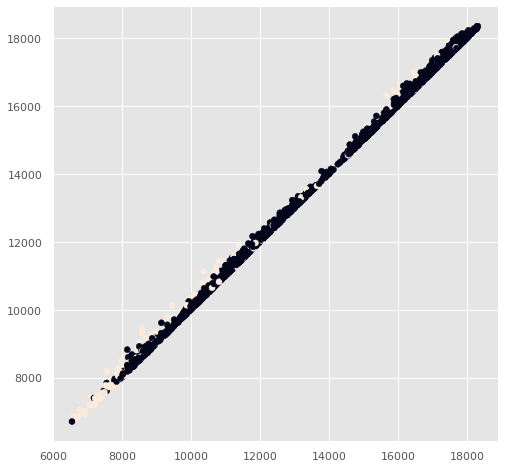

In [214]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
clusters1 = kmeans1.fit_predict(df.loc[:, df.columns != 'Date'])
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df["Close"], df["High"], c=clusters1)
plt.show()

In [234]:
dk=df.copy()
dk=dk.drop(['Date'],1)
dk=dk.drop(['Label'],1)
dk.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Open         Close          High           Low     Volume  \
0  11432.089844  11734.320312  11759.959961  11388.040039  212830000   
1  11729.669922  11782.349609  11867.110352  11675.530273  183190000   
2  11781.700195  11642.469727  11782.349609  11601.519531  173590000   
3  11632.809570  11532.959961  11633.780273  11453.339844  182550000   
4  11532.070312  11615.929688  11718.280273  11450.889648  159790000   

   Subjectivity  Polarity  compound    neg    pos    neu  OC Increase  \
0      0.267549 -0.048568   -0.9982  0.235  0.041  0.724     2.643703   
1      0.374806  0.121956   -0.9858  0.191  0.089  0.721     0.449115   
2      0.536234 -0.044302   -0.9715  0.128  0.056  0.816    -1.181752   
3      0.364021  0.011398   -0.9809  0.146  0.066  0.788    -0.858345   
4      0.375099  0.040677   -0.9882  0.189  0.094  0.717     0.727184   

     HL Average         Total  
0  11574.000000  2.463294e+12  
1  11771.320312  2.156388e+12  
2  11691.934570  2.029603e+12  
3  11543.560058  2.107277e+12  
4  11584.584961  1.851101e+12

In [236]:
X_train, X_test, y_train, y_test = train_test_split(dk,df['Label'], test_size=0.2, random_state=42)

In [238]:
X_train[["Open","Close"]].head()

Open         Close
807   11502.129883  11541.780273
1939  17985.050781  18003.750000
416   10972.490234  10969.990234
1273  14817.910156  14840.950195
543   10752.780273  10944.719727

[1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0]


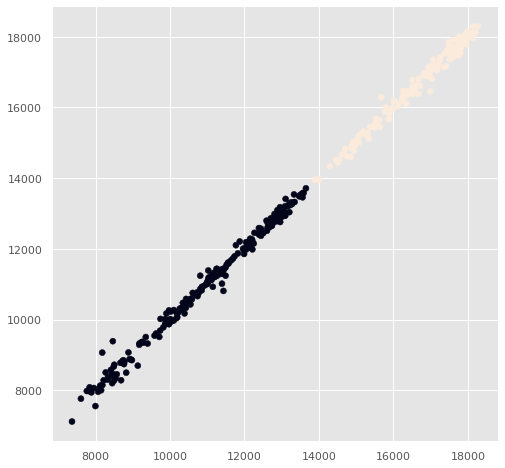

[0 1 0 ... 0 1 1]
[[11037.43466668 11036.14282769]
 [16600.14482319 16603.41720478]]


In [244]:
from sklearn.cluster import KMeans
clusters1 = KMeans(n_clusters=2)
clusters1 = clusters1.fit(X_train[["Open","Close"]])
clsa=clusters1.predict(X_test[["Open","Close"]])
print(clsa)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(X_test["Open"], X_test["Close"], c=clsa)
plt.show()
print(clusters1.labels_)
print(clusters1.cluster_centers_)

**Evaluation**

0.4623115577889447
              precision    recall  f1-score   support

           0       0.40      0.52      0.45       171
           1       0.54      0.42      0.47       227

    accuracy                           0.46       398
   macro avg       0.47      0.47      0.46       398
weighted avg       0.48      0.46      0.46       398



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

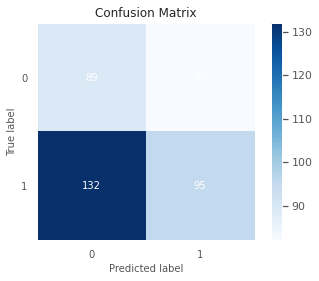

In [258]:
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
eva=pd.DataFrame()
eva["Actual"]=y_test
eva["Cluster"]=clsa
eva.head()
Evaluation=np.sum(eva["Actual"]==eva["Cluster"])/len(eva)
print(Evaluation)


print(classification_report(eva["Actual"],eva["Cluster"]))
plot_confusion_matrix(eva["Actual"],eva["Cluster"])

# **PCA**

In [266]:
X_train.head()

Open         Close          High           Low     Volume  \
807   11502.129883  11541.780273  11581.250000  11391.139648  166100000   
1939  17985.050781  18003.750000  18026.849609  17909.890625  134120000   
416   10972.490234  10969.990234  10987.379883  10927.519531  159960000   
1273  14817.910156  14840.950195  14916.009766  14792.110352   93170000   
543   10752.780273  10944.719727  10965.610352  10752.629883  216240000   

      Subjectivity  Polarity  compound    neg    pos    neu  OC Increase  \
807       0.303624  0.019533    0.0075  0.111  0.108  0.780     0.344722   
1939      0.415885 -0.019531   -0.9217  0.142  0.115  0.743     0.103971   
416       0.379332 -0.018519   -0.9987  0.212  0.050  0.738    -0.022784   
1273      0.404503  0.023811   -0.9954  0.139  0.057  0.804     0.155488   
543       0.301925  0.028911   -0.9818  0.125  0.081  0.794     1.785022   

        HL Average         Total  
807   11486.194824  1.907857e+12  
1939  17968.370117  2.409918e+12  
416   10957.449707  1.752754e+12  
1273  14854.060059  1.383953e+12  
543   10859.120117  2.348176e+12

In [268]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
PCdf = pd.DataFrame(data = principalComponents, columns = ['PC1 1', 'PC2 2'])
PCdf.head()

PC1 1         PC2 2
0 -6.980835e+10 -1.099989e+07
1  4.322525e+11  7.343876e+07
2 -2.249117e+11 -2.106612e+07
3 -5.937125e+11  7.189114e+06
4  3.705108e+11 -1.513242e+07

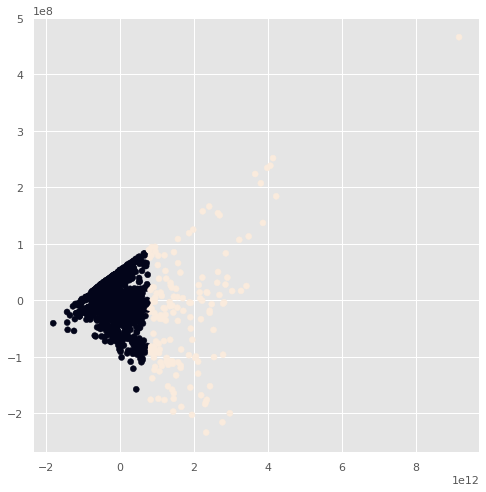

In [270]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
clusters1 = kmeans1.fit_predict(PCdf)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(PCdf["PC1 1"],PCdf["PC2 2"], c=clusters1)
plt.show()


              precision    recall  f1-score   support

           0       0.46      0.88      0.61       753
           1       0.44      0.08      0.14       838

    accuracy                           0.46      1591
   macro avg       0.45      0.48      0.37      1591
weighted avg       0.45      0.46      0.36      1591



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

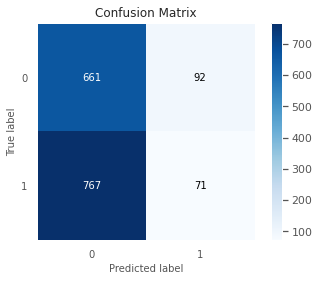

In [272]:
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
print(classification_report(y_train,clusters1))
plot_confusion_matrix(y_train,clusters1)

In [275]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train[['Open','Close', 'High', 'Low']])
PCdf = pd.DataFrame(data = principalComponents, columns = ['PC1 1', 'PC2 2'])
PCdf.head()

PC1 1       PC2 2
0  3880.642260  -21.618909
1 -9074.034877  -16.244091
2  4959.977221  -26.068031
3 -2794.755771  -25.034629
4  5180.916344 -121.450912

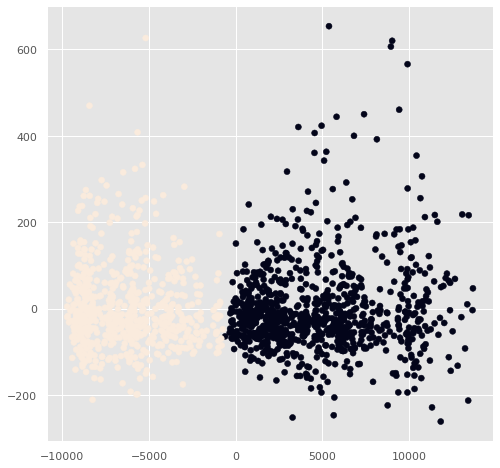

In [276]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
clusters1 = kmeans1.fit_predict(PCdf)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(PCdf["PC1 1"],PCdf["PC2 2"], c=clusters1)
plt.show()

              precision    recall  f1-score   support

           0       0.48      0.58      0.52       753
           1       0.54      0.44      0.49       838

    accuracy                           0.51      1591
   macro avg       0.51      0.51      0.51      1591
weighted avg       0.51      0.51      0.50      1591



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

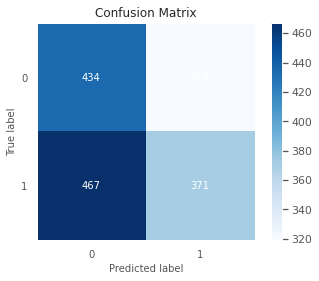

In [277]:
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
print(classification_report(y_train,clusters1))
plot_confusion_matrix(y_train,clusters1)